# Data Mining
## HARTLEY Marc
---

## TL;DR :
Ce projet est un exercice de Data Mining.  
Pour être directement aux réponses de l'énoncé :
* [1. Présentez vos données, leur signification, et les questions auxquelles vous souhaitez répondre](#Le-jeu-de-données)
* [2. Préparez les données.](#Préparation-des-données)
* [3. Faites une analyse exploratoire unidimensionnelle à l'aide des représentations et indicateurs dédiés.](#Présentation-des-données)
* [4. Faites une analyse exploratoire bidimensionnelle à l'aide des représentations et indicateurs dédiés.](#Les-variables-entre-elles)
* [5. Appliquez au moins une technique de clustering ET une technique de réduction de dimension sur vos données.](#Reduction-de-dimensions-:-ACP)
* [6. Réalisez au moins un modèle de scoring à partir de vos données.](#Scoring-sur-la-question-AGR2-:-Je-m'interesse-aux-gens.)
*Pour une classification binaire, voir [ici](#Scoring)*


## Introduction :  
Le but de ce projet est l'analyse d'un jeu de données à travers des outils de regression, de clustering, de prédictions, etc... 
Nous allons utiliser un jeu de données concernant le caractère d'une personne et essayer de trouver une corrélation entre les caractéristiques.

## Le jeu de données
Nous nous intéressons au jeu de données [Big Five Personality Test](https://www.kaggle.com/tunguz/big-five-personality-test) mis en ligne par [@tunguz](https://www.kaggle.com/tunguz/) sur [Kaggle](https://www.kaggle.com/). Ce test, aussi appelé [*OCEAN*](https://en.wikipedia.org/wiki/Big_Five_personality_traits) a été mis en ligne par [Open Psychometrics](https://openpsychometrics.org/tests/IPIP-BFFM/) et rassemble plus d'un million de réponses.  
### Le test
Le test propose une série de 50 questions concernant la psychologie de la personne pour lesquelles la personne donne une valeurs entre 1 (pas d'accord du tout) et 5 (totalement d'accord).  
Les questions sont toutes liées à un traits de comportement suivant : 

| Trait                          | Abrégé (de l'anglais) |
|:-------------------------------|:----------------------|
| **O**uverture d'esprit         | OPN                   |
| **C**onscienciosité            | CSN                   |
| **E**xtraversion               | EXT                   |
| **A**mabilité                  | AGR                   |
| **N**euroticisme (nervosité)   | EST                   |

### Les questions
Voici la liste des questions posées dans l'ordre dans ce test : 

| I....                                             | I.....                                                     |
|:--------------------------------------------------|:-----------------------------------------------------------|
| 1. Am the life of the party.                      | 26. Have little to say.                                    |
| 2. Feel little concern for others.                | 27. Have a soft heart.                                     |
| 3. Am always prepared.                            | 28. Often forget to put things back in their proper place. |
| 4. Get stressed out easily.                       | 29. Get upset easily.                                      |
| 5. Have a rich vocabulary.                        | 30. Do not have a good imagination.                        |
| 6. Don't talk a lot.                              | 31. Talk to a lot of different people at parties.          |
| 7. Am interested in people.                       | 32. Am not really interested in others.                    |
| 8. Leave my belongings around.                    | 33. Like order.                                            |
| 9. Am relaxed most of the time.                   | 34. Change my mood a lot.                                  |
| 10. Have difficulty understanding abstract ideas. | 35. Am quick to understand things.                         |
| 11. Feel comfortable around people.               | 36. Don't like to draw attention to myself.                |
| 12. Insult people.                                | 37. Take time out for others.                              |
| 13. Pay attention to details.                     | 38. Shirk my duties.                                       |
| 14. Worry about things.                           | 39. Have frequent mood swings.                             |
| 15. Have a vivid imagination.                     | 40. Use difficult words.                                   |
| 16. Keep in the background.                       | 41. Don't mind being the center of attention.              |
| 17. Sympathize with others' feelings.             | 42. Feel others' emotions.                                 |
| 18. Make a mess of things.                        | 43. Follow a schedule.                                     |
| 19. Seldom feel blue.                             | 44. Get irritated easily.                                  |
| 20. Am not interested in abstract ideas.          | 45. Spend time reflecting on things.                       |
| 21. Start conversations.                          | 46. Am quiet around strangers.                             |
| 22. Am not interested in other people's problems. | 47. Make people feel at ease.                              |
| 23. Get chores done right away.                   | 48. Am exacting in my work.                                |
| 24. Am easily disturbed.                          | 49. Often feel blue.                                       |
| 25. Have excellent ideas.                         | 50. Am full of ideas.                                      |

### Les données
Le dataset proposé par @tunguz propose plusieurs colonnes :
* Les réponses de chaque question sous le nom Abrégé+N<sup>o</sup> Question (ex : EXT5, OPN10, CSN8, ...). Les questions sont numérotées de 1 à 10 pour chaque trait.
* ~~Le temps mis pour répondre à chaque question (en millisecondes), sous le nom NomQuestion_E (ex : EXT5_E, OPN10_E, CSN8_E, ...).~~
* ~~dateload : Date et heure où le test est passé~~
* ~~screenw : Largeur de l'écran de l'utilisateur~~
* ~~screenh : Hauteur de l'écran de l'utilisateur~~
* ~~introelapse : Temps passé sur la page "d'intro"~~
* ~~testelapse : Temps total passé sur les questions (en secondes)~~
* ~~endelapse : Temps passé sur la "page de finalisation" où il est demandé à la personne s'il souhaite ou non que ses données soient diffusées.~~
* IPC : Nombre de tests effectué depuis une même adresse IP
* country : Pays de l'utilisateur (information récupérée de manière automatique)
* ~~lat_appx_lots_of_err et long_appx_lots_of_err : Longitude/Lattitute de l'utilisateur. D'après le nom, on ne veux pas trop s'y fier.~~

Les lignes non-barrées sont celles conservées. Nous ajoutons aussi une colonne pour chaque trait de personnalité qui represente la moyenne de ses question que nous appelons par l'abréviation anglaise (ex : EXT, OPN, CSN, ...)

## Objectifs
À travers ce projet nous allons essayer de voir si avec les réponses aux questions nous pouvons déterminer des informations sur une personne.
Les questions informations que nous essayerons de déterminer sont :
* Avec toutes les réponses d'une personne, est-il possible de savoir si cette personne est américaine?
* Avec toutes les réponses sauf une, peut-on savoir si une personne s'interesse aux autres? (Q.7 / AGR2)

Nous allons tâcher de répondre à ces questions tout au long de ce notebook.
Il va d'abord falloir traiter les données pour maximiser notre efficité, puis nous regarderons ensemble les resultats de ces tests sous différentes perspectives : tout d'abord en détaillant chaque variable puis de plus en plus global. Nous utiliserons de la classification et de la regression pour connaitre nos réponses. Puis enfin nous conclurons sur notre travail.

## Préparation des données

Premièrement, chargeons les données.

In [15]:
# Configuration du notebook
%load_ext autoreload
%autoreload 2
%matplotlib notebook

# Importation des modules
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from   importlib import reload
from   scipy.stats import kurtosis, skew
import sklearn
import sklearn.metrics as metrics
import sklearn.tree as tree
import sklearn.neighbors as neighbors
from   sklearn.cluster import KMeans
import sklearn.ensemble as ensemble
import sklearn.svm as svm
import sklearn.linear_model as linear_model
import sklearn.model_selection as model_selection
from   sklearn import preprocessing
from   sklearn.metrics import confusion_matrix
from   sklearn.model_selection import train_test_split
import numpy as np
import copy
import math
import colorsys
import warnings
import sys
from   fanalysis.pca import PCA
from   fanalysis.mca import MCA
from   PCA_hartley import * # Graphical adaptation of fanalysis.pca / mca for this specific dataset
import os

os.makedirs('personality', exist_ok=True)
os.makedirs('figures', exist_ok=True)
os.makedirs('classifiers', exist_ok=True)

if not os.path.exists("personality/data-final.csv"):
    import urllib.request
    from   zipfile import ZipFile
    import shutil

    url = 'https://storage.googleapis.com/kaggle-data-sets/516764/951745/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1589031294&Signature=YdRwDdnNBZwyp%2BB%2BFqiSX5YT3Zfg7r78ulMfOvaKAz3l%2Fw69FGHNU%2Bj3teUgeYj7NLbNNGhbiwzrg10QaNWvtaq%2BWDh27F3T6oelW6uVJKtbbf2vknvgXiTXS84H85L9%2BsmlcRC2qyOw5bhSNRtbsOK4W%2B%2FeSJ8h56jCBvc70jddJCjRW8fuM9npc5Ff5v5wZEKAzB6xZ%2BCxRTQevnbtr%2FFEAvH8ZpIbQEO1kfue%2F6cbtwyIEGcHYwqfyyKG4mly0zJ9w%2BH3GOq2c4%2BwuMNA%2BtZa5lChlVChptQkE4zW%2FaeqK0h7UnwJoIku5PA6vrmA8Aeq8JKyGqnbj6Stu52vog%3D%3D&response-content-disposition=attachment%3B+filename%3Dbig-five-personality-test.zip'
    print("Besoin de télécharger le jeu de données... Le lien suivant n'est pas forcément efficace, dans ce cas, merci de télécharger l'archive à l'adresse https://www.kaggle.com/tunguz/big-five-personality-test et le placer dans le dossier \"personality\"")
    urllib.request.urlretrieve(url, 'personality/data-final.zip')
    print("extraction...")
    # Create a ZipFile Object and load sample.zip in it
    with ZipFile('personality/data-final.zip', 'r') as zipObj:
        # Get a list of all archived file names from the zip
        listOfFileNames = zipObj.namelist()
        # Iterate over the file names
        for fileName in listOfFileNames:
            # Check filename endswith csv
            if fileName.endswith('.csv'):
                # Extract a single file from zip
                zipObj.extract(fileName, 'personality')
        os.replace("personality/IPIP-FFM-data-8Nov2018/data-final.csv", "personality/data-final.csv")
        shutil.rmtree('personality/IPIP-FFM-data-8Nov2018', ignore_errors=True)
    

warnings.filterwarnings('ignore') # Remove warnings from sklearn


# Configuration de l'affichage de pandas
pd.set_option('display.max_columns', None) # Display options : all columns on one line
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Récupération des données
data = pd.read_csv("personality/data-final.csv", sep="\t").dropna()

data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Besoin de télécharger le jeu de données... Le lien suivant n'est pas forcément efficace, dans ce cas, merci de télécharger l'archive à l'adresse https://www.kaggle.com/tunguz/big-five-personality-test et le placer dans le dossier "personality"
extraction...


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10  EXT1_E  EXT2_E  EXT3_E  EXT4_E  EXT5_E  EXT6_E  EXT7_E  \
0   4.0    5.0  9419.0  5491.0  3959.0  4821.0  5611.0  2756.0  2388.0   
1   5.0    3.0  7235.0  3598.0  3315.0  2564.0  2976.0  3050.0  4787.0   
2   4.0    4.0  4657.0  3549.0  2543.0  3335.0  5847.0  2540.0  4922.0   
3   3.0    3.0  3996.0  2896.0  5096.0  4240.0  5168.0  5456.0  4360.0   
4   5.0    5.0  6004.0  3965.0  2721.0  3706.0  2968.0  2426.0  7339.0   

   EXT8_E   EXT9_E  EXT10_E  EST1_E  EST2_E  EST3_E  EST4_E  EST5_E  EST6_E  \
0  2113.0   5900.0   4110.0  6135.0  4150.0  5739.0  6364.0  3663.0  5070.0   
1  3228.0   3465.0   3309.0  9036.0  2406.0  3484.0  3359.0  3061.0  2539.0   
2  3142.0  14621.0   2191.0  5128.0  3675.0  3442.0  4546.0  8275.0  2185.0   
3  4496.0   5240.0   4000.0  3736.0  4616.0  3015.0  2711.0  3960.0  4064.0   
4  3302.0  16819.0   3731.0  4740.0  2856.0  7461.0  2179.0  3324.0  2255.0   

   EST7_E  EST8_E  EST9_E  EST10_E  AGR1_E   AGR2_E   AGR3_E  AGR4_E   AGR5_E  \
0  5709.0  4285.0  2587.0   3997.0  4750.0   5475.0  11641.0  3115.0   3207.0   
1  4226.0  2962.0  1799.0   1607.0  2158.0   2090.0   2143.0  2807.0   3422.0   
2  2164.0  1175.0  3813.0   1593.0  1089.0   2203.0   3386.0  1464.0   2562.0   
3  4208.0  2936.0  7336.0   3896.0  6062.0  11952.0   1040.0  2264.0   3664.0   
4  4308.0  4506.0  3127.0   3115.0  6771.0   2819.0   3682.0  2511.0  16204.0   

   AGR6_E   AGR7_E   AGR8_E  AGR9_E  AGR10_E  CSN1_E  CSN2_E  CSN3_E  CSN4_E  \
0  3260.0  10235.0   5897.0  1758.0   3081.0  6602.0  5457.0  1569.0  2129.0   
1  5324.0   4494.0   3627.0  1850.0   1747.0  5163.0  5240.0  7208.0  2783.0   
2  1493.0   3067.0  13719.0  3892.0   4100.0  4286.0  4775.0  2713.0  2813.0   
3  3049.0   4912.0   7545.0  4632.0   6896.0  2824.0   520.0  2368.0  3225.0   
4  1736.0  28983.0   1612.0  2437.0   4532.0  3843.0  7019.0  3102.0  3153.0   

   CSN5_E  CSN6_E  CSN7_E   CSN8_E   CSN9_E  CSN10_E  OPN1_E  OPN2_E   OPN3_E  \
0  3762.0  4420.0  9382.0   5286.0   4983.0   6339.0  3146.0  4067.0   2959.0   
1  4103.0  3431.0  3347.0   2399.0   3360.0   5595.0  2624.0  4985.0   1684.0

In [2]:
data.shape

(1012050, 110)

In [3]:
data.describe(include='all')

EXT1          EXT2          EXT3          EXT4          EXT5  \
count   1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.647892e+00  2.773242e+00  3.288202e+00  3.140699e+00  3.276805e+00   
std     1.264476e+00  1.323982e+00  1.215083e+00  1.237473e+00  1.277636e+00   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%     3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%     4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max     5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

                EXT6          EXT7          EXT8          EXT9         EXT10  \
count   1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.401119e+00  2.771527e+00  3.414799e+00  2.963761e+00  3.556569e+00   
std     1.225812e+00  1.400348e+00  1.271954e+00  1.346053e+00  1.305249e+00   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     1.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  3.000000e+00   
50%     2.000000e+00  3.000000e+00  4.000000e+00  3.000000e+00  4.000000e+00   
75%     3.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  5.000000e+00   
max     5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

                EST1          EST2          EST3          EST4          EST5  \
count   1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    3.285994e+00  3.164965e+00  3.846476e+00  2.663509e+00  2.842890e+00   
std     1.345608e+00  1.228296e+00  1.163425e+00  1.252982e+00  1.273899e+00   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.000000e+00  2.000000e+00  3.000000e+00  2.000000e+00  2.000000e+00   
50%     3.000000e+00  3.000000e+00  4.000000e+00  3.000000e+00  3.000000e+00   
75%     4.000000e+00  4.000000e+00  5.000000e+00  4.000000e+00  4.000000e+00   
max     5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

                EST6          EST7          EST8          EST9         EST10  \
count   1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.841069e+00  3.050391e+00  2.683425e+00  3.088464e+00  2.773686e+00   
std     1.326569e+00  1.293036e+00  1.343042e+00  1.297149e+00  1.323210e+00   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00   
50%     3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   
75%     4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
max     5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

                AGR1          AGR2          AGR3          AGR4          AGR5  \
count   1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06  1.012050e+06   
unique      

Nous allons nous limiter à 20.000 lignes pour réduire le temps des calculs. Nous utiliserons ensuite, dans la pratique, moins de 10.000 lignes.

In [4]:
data = data.head(20000)

Les formulaires remplis plusieurs fois avec une même adresse IP peuvent être biaisés.

In [5]:
data = data[data.IPC == 1]

On retire les dolonnes supposées inutiles. On choisit aussi de ne pas garder les temps de reflexion :

In [6]:
data = data.drop(columns=['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'])
data = data.drop(columns=[column for column in data.columns if column[-2:] == "_E"])

On a aussi pu remarquer que les questions ont un minimum de 0. Il se trouve que lorsqu'on remplit le formulaire en ligne, il n'y a pas de verifications d'absence de réponse. Le 0 n'a donc aucune signification (doute sur la réponse? "Ne souhaite pas répondre"? Simple oubli?) Nous n'avons donc pas le choix que de supprimer ces valeurs. Nous possédons suffisament d'individus pour nous permettre d'ignorer les lignes dans lesquelle il existe un 0.

In [7]:
for column in data.columns:
    if data[column].dtype.kind in 'biufc': # colonne numerique
        data = data[data[column] > 0]

On peut remarquer qu'il existe une écrasante majorité d'enregistrements réalisés aux US dans ce test. Pour réduire les inégalités, on va supprimer certaines données venues de "US" pour n'en garder que 50%. Cela pourrait nous servir plus tard pour répondre à la question "Nos traits de personnalité permettent-ils de savoir si nous sommes américains ou non?".

In [8]:
dataWithUS = data[data.country == 'US']
dataWithoutUS = data[data.country != 'US']
#Keep 50% of US and 50% of other
data = pd.concat([dataWithoutUS, dataWithUS.iloc[:dataWithoutUS.shape[0], :]])
#Shuffle the data to avoid having all the US at the end
data = data.sample(frac=1).reset_index(drop=True)

Les questions d'un même trait peuvent être de signification opposées (ex pour EXT : "1. I am the life of the party" et "6. I don't talk a lot."). On va alors inverser le score de ces questions.

In [9]:
groups_coef = {
    'EXT' : {
        'name' : 'Introversion/Extroversion',
        'coef' : [1, -1, 1, -1, 1, -1, 1, -1, 1, -1,],
        'groups' : []
    },
    'EST' : {
        'name' : 'Negative Emotionality/Emotional Stability',
        'coef' : [ -1, 1, -1, 1, -1, -1, -1, -1, -1, -1],
        'groups' : []
    },
    'AGR' : {
        'name' : 'Friendly/Agressive',
        'coef' : [1, -1, 1, -1, 1, -1, 1, -1, -1, -1],
        'groups' : []
    },
    'CSN' : {
        'name' : 'Impulsive/Careful',
        'coef' : [1, -1, 1, -1, 1, -1, 1, -1, 1, 1],
        'groups' : []
    },
    'OPN' : {
        'name' : 'Traditional/Open to experience',
        'coef' : [1, -1, 1, -1, 1, -1, 1, 1, 1, 1],
        'groups' : []
    }
}

In [10]:
# Les questions entre 1 et 10
columnsNumber = [x for x in range(1, 11)] 
traits = []
questions = []
groupsAndNumber = {}
for group in groups_coef:
    traits.append(group)
    for number in columnsNumber:
        questions.append(group + str(number))
        groupsAndNumber[group + str(number)] = {'group': group, 'coef' : groups_coef[group]['coef'][number-1]}
        groups_coef[group]['groups'].append(group + str(number))
    data[group] = [0]*data.shape[0]

print("Applying coefs...")
for col in data.columns:
    if col in groupsAndNumber:
        # Réarrange les valeurs de -2 à 2
        if groupsAndNumber[col]['coef'] > 0:
            data[col] = data[col].apply(lambda x: x - 3)
        else:
            data[col] = data[col].apply(lambda x: -(x - 3))
            
#            [(x - midValue) if groupsAndNumber[col]['coef'] > 0 else -(x - midValue) for x in data[col]] 

for group in groups_coef:
    data[group] = data.apply(lambda row : row[groups_coef[group]['groups']].mean(), axis=1) 

Applying coefs...


In [11]:
data.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0  -2.0  -1.0   0.0  -2.0  -1.0  -1.0  -2.0  -2.0  -1.0   -2.0  -1.0  -1.0   
1   1.0  -2.0   1.0  -0.0  -1.0  -2.0  -1.0   2.0   1.0   -2.0   1.0  -1.0   
2   1.0  -1.0   1.0  -0.0  -1.0  -1.0  -1.0  -1.0   0.0   -1.0   1.0  -1.0   
3  -1.0   1.0   2.0  -0.0   2.0  -1.0   0.0  -2.0   0.0    1.0  -1.0  -1.0   
4   0.0   1.0   1.0  -0.0  -2.0  -1.0   0.0  -0.0   2.0   -2.0   2.0   0.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0  -2.0   0.0  -1.0  -1.0   1.0  -0.0  -1.0   -0.0  -2.0  -1.0   1.0   1.0   
1  -2.0   1.0  -2.0  -1.0  -1.0  -1.0  -1.0   -1.0  -1.0  -0.0  -2.0  -0.0   
2   1.0  -2.0  -0.0  -1.0  -2.0  -1.0  -0.0   -1.0  -1.0  -0.0   1.0  -1.0   
3  -0.0   0.0  -0.0  -0.0  -1.0  -0.0  -1.0    1.0   0.0  -2.0   2.0   1.0   
4  -2.0   0.0  -2.0   2.0  -0.0   2.0   2.0   -0.0   1.0   1.0  -2.0   1.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0  -1.0  -2.0   1.0   1.0  -1.0   -0.0   0.0   2.0   1.0   1.0  -2.0  -2.0   
1   2.0  -1.0   1.0   1.0  -0.0   -2.0  -1.0   1.0   1.0  -1.0   0.0  -2.0   
2   0.0  -1.0   0.0  -0.0   1.0    1.0   0.0   2.0   2.0   1.0  -1.0   2.0   
3   0.0  -1.0  -2.0  -0.0  -0.0   -2.0   1.0  -1.0   2.0   2.0   0.0   1.0   
4   1.0   2.0  -1.0   2.0  -1.0   -2.0   2.0   2.0   2.0  -0.0   2.0   2.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   2.0  -1.0  -2.0   -1.0   0.0   1.0   1.0   1.0   2.0   1.0  -2.0  -1.0   
1   1.0  -0.0  -1.0    0.0  -2.0   1.0   0.0  -0.0   0.0   1.0   0.0  -2.0   
2   1.0  -0.0   1.0    0.0   1.0   1.0   1.0  -0.0   0.0   1.0   2.0   1.0   
3   2.0   2.0   1.0    1.0   1.0   2.0   2.0   2.0   0.0   2.0   1.0  -2.0   
4   2.0  -0.0   2.0    2.0   0.0  -2.0   2.0  -2.0   0.0   2.0  -1.0  -2.0   

   OPN9  OPN10 country  EXT  EST  AGR  CSN  OPN  
0   2.0   -1.0      AU -1.4 -0.6 -0.3 -0.2  0.4  
1   1.0    1.0      PK -0.3 -0.8 -0.2 -0.2  0.0  
2   0.0   -1.0      SE -0.4 -0.6  0.0  0.8  0.6  
3   1.0    1.0      US  0.2 -0.3 -0.4  1.1  1.0  
4   2.0    2.0      CA -0.1  0.4  0.2  1.6  0.1

In [12]:
data.shape

(11697, 56)

In [13]:
data.describe(include='all')

EXT1          EXT2          EXT3          EXT4          EXT5  \
count   11697.000000  11697.000000  11697.000000  11697.000000  11697.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.395913      0.152774      0.265367     -0.227067      0.260836   
std         1.228979      1.312168      1.185162      1.200594      1.234867   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -2.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%         0.000000     -0.000000      0.000000     -0.000000      0.000000   
75%         1.000000      1.000000      1.000000      1.000000      1.000000   
max         2.000000      2.000000      2.000000      2.000000      2.000000   

                EXT6          EXT7          EXT8          EXT9         EXT10  \
count   11697.000000  11697.000000  11697.000000  11697.000000  11697.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.504830     -0.248953     -0.472001     -0.006668     -0.642216   
std         1.229482      1.356605      1.234586      1.329499      1.264643   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -0.000000     -1.000000     -2.000000     -1.000000     -2.000000   
50%         1.000000      0.000000     -1.000000      0.000000     -1.000000   
75%         1.000000      1.000000     -0.000000      1.000000     -0.000000   
max         2.000000      2.000000      2.000000      2.000000      2.000000   

                EST1          EST2          EST3          EST4          EST5  \
count   11697.000000  11697.000000  11697.000000  11697.000000  11697.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       -0.329315      0.221937     -0.895187     -0.298795      0.088655   
std         1.296682      1.178417      1.104473      1.220434      1.250139   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -1.000000     -1.000000     -2.000000     -1.000000     -1.000000   
50%        -1.000000      0.000000     -1.000000      0.000000     -0.000000   
75%         1.000000      1.000000     -0.000000      1.000000      1.000000   
max         2.000000      2.000000      2.000000      2.000000      2.000000   

                EST6          EST7          EST8          EST9         EST10  \
count   11697.000000  11697.000000  11697.000000  11697.000000  11697.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.105070     -0.113020      0.270668     -0.144481      0.170129   
std         1.291807      1.251968      1.313636      1.262077      1.299711   
min        -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        -0.000000     -0.000000     -0.000000     -0.000000     -0.000000   
75%         1.000000      1.000000      1.000000      1.000000      1.000000   
max         2.000000      2.000000      2.000000      2.000000      2.000000   

                AGR1          AGR2          AGR3          AGR4          AGR5  \
count   11697.000000  11697.000000  11697.000000  11697.000000  11697.000000   
unique      

---

## Présentation des données

---
Nous avons maintenant des données entière entre -2 et 2 pour les réponses aux questions et des nombres flottants pour les moyennes. Voyons comment sont réparties ces données :

<IPython.core.display.Javascript object>


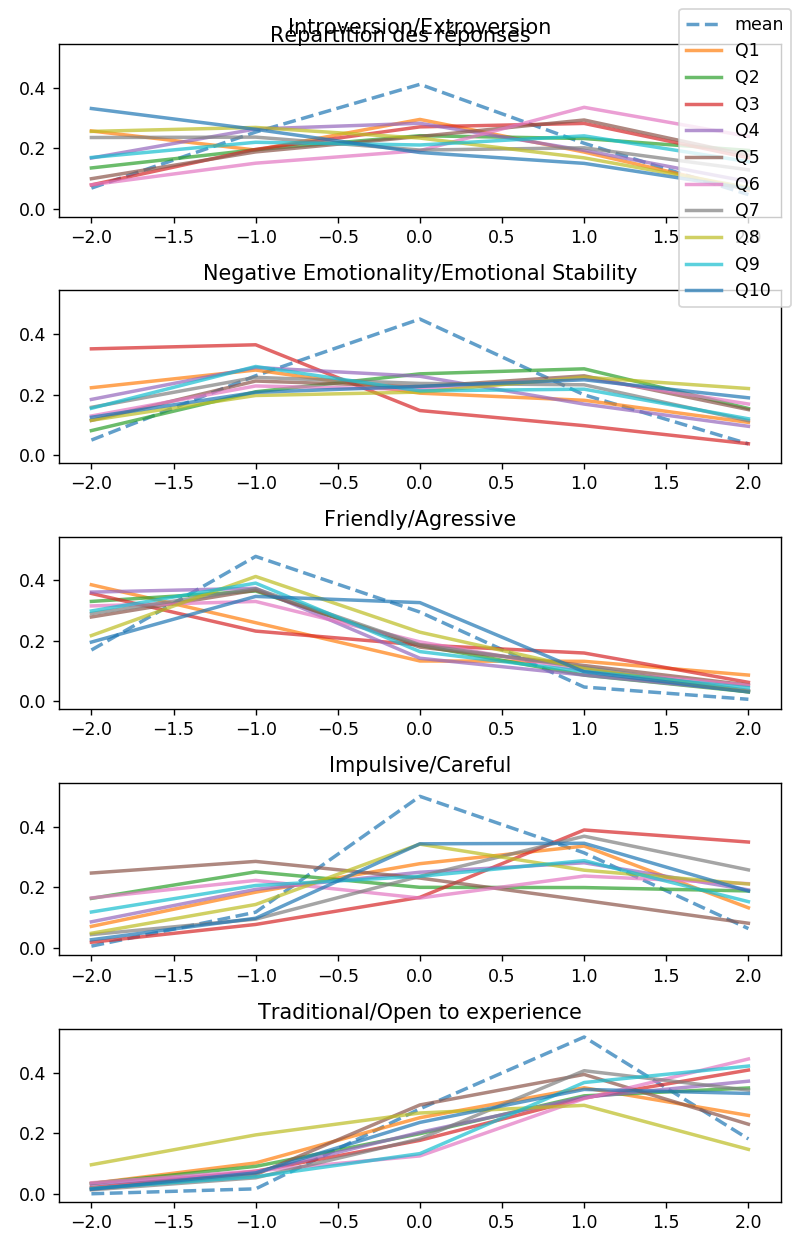

In [14]:
fig, axes = plt.subplots(len(groups_coef), 1, sharey=True, figsize=[6.4, 10]) # One plot per group, on 2 lines
plt.suptitle("Répartition des réponses")
for i, main_group in enumerate(groups_coef):
    #summary:
    meanVals = {}
    for val in range(-2, 3): 
        meanVals[val] = len([x for x in data[main_group] if round(x) == val])/data.shape[0]
    axes[i].plot([key for key in meanVals.keys()], [meanVals[key] for key in meanVals.keys()], linestyle="--", lw=2, alpha=0.7, label="mean" if i == 0 else None)
    axes[i].set_title(groups_coef[main_group]['name'])
    for question in groups_coef[main_group]['groups']: # Pour chaque question du groupe
        for val in range(-2, 3): 
            meanVals[val] = len([x for x in data[question] if round(x) == val])/data.shape[0]
        axes[i].plot([key for key in meanVals.keys()], [meanVals[key] for key in meanVals.keys()], linestyle="-", lw=2, alpha=0.7, label="Q" + question[3:] if i == 0 else None)
fig.legend()
plt.tight_layout()
plt.savefig("figures/fig_1.png")
plt.show()

On peut voir dans cet amas de courbes qu'en moyenne les traits de personnalité sont centrés en 0 et symmétriques. On voit une exception pour AGR ("Agressive / Friendly") qui a une dominante "Friendly" et OPN ("Traditional / Open to Experience") qui penche vers l'Openness.  
On peut trouver des cas un peu "differents" dans les questions (ex : EXT Q10, EST Q 3,...).

<IPython.core.display.Javascript object>


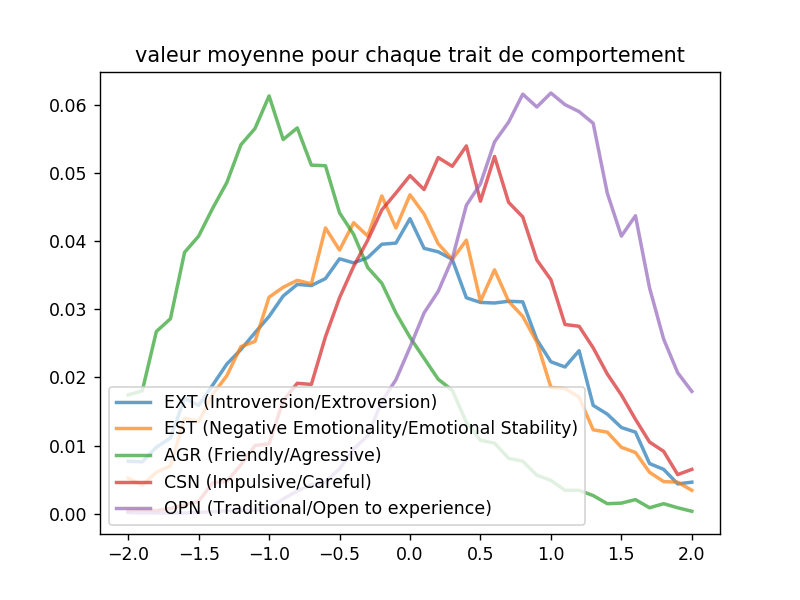

EXT : Kurtosis = -0.71 	| Skewness = 0.05
EST : Kurtosis = -0.54 	| Skewness = 0.1
AGR : Kurtosis = 0.33 	| Skewness = 0.66
CSN : Kurtosis = -0.39 	| Skewness = -0.03
OPN : Kurtosis = -0.09 	| Skewness = -0.4


In [15]:
plt.figure()
for i, main_group in enumerate(groups_coef):
    #summary:
    meanVals = []
    for val in sorted(data[main_group].values): 
        meanVals.append((val, len([x for x in data[main_group] if x == val])/data.shape[0]))
    kurto = kurtosis(data[main_group].values)
    sym = skew(data[main_group].values)
    print(main_group, ": Kurtosis =", round(kurto, 2), "\t| Skewness =", round(sym, 2))
    plt.plot([xy[0] for xy in meanVals], [xy[1] for xy in meanVals], linestyle="-", lw=2, alpha=0.7, label=main_group + " (" + groups_coef[main_group]['name'] + ")")
plt.legend(loc="best")
plt.title("valeur moyenne pour chaque trait de comportement")
plt.savefig("figures/fig_2.png")
plt.show()

<IPython.core.display.Javascript object>


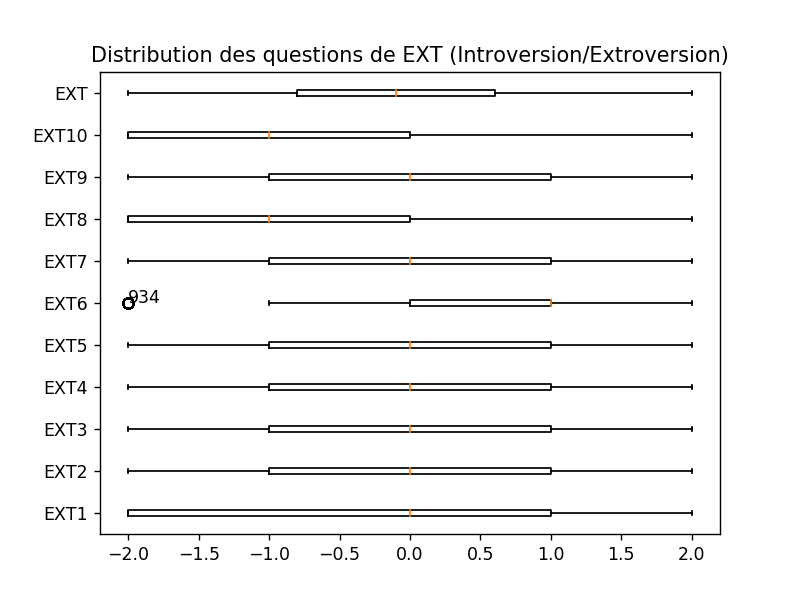

<IPython.core.display.Javascript object>


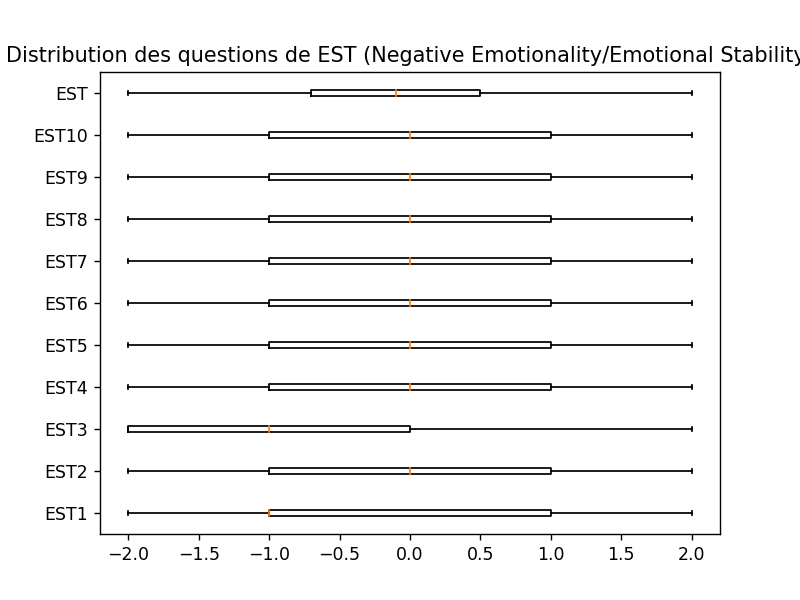

<IPython.core.display.Javascript object>


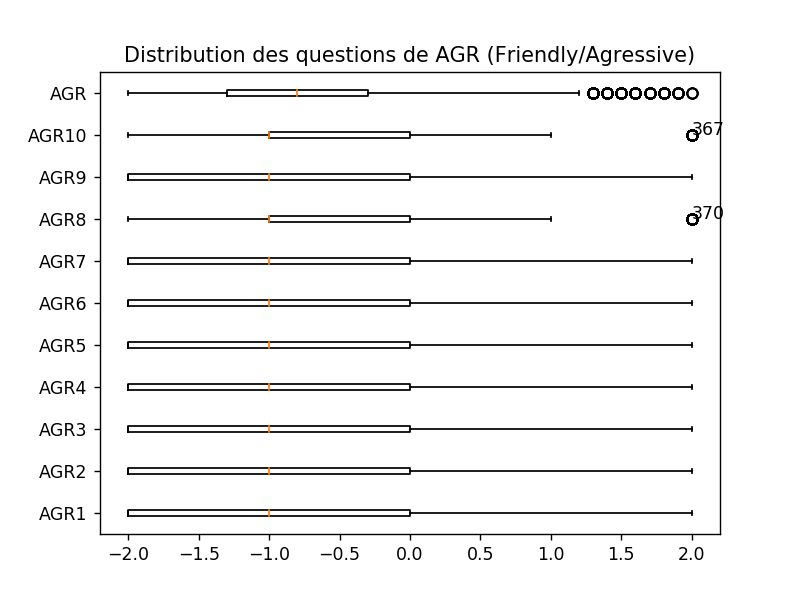

<IPython.core.display.Javascript object>


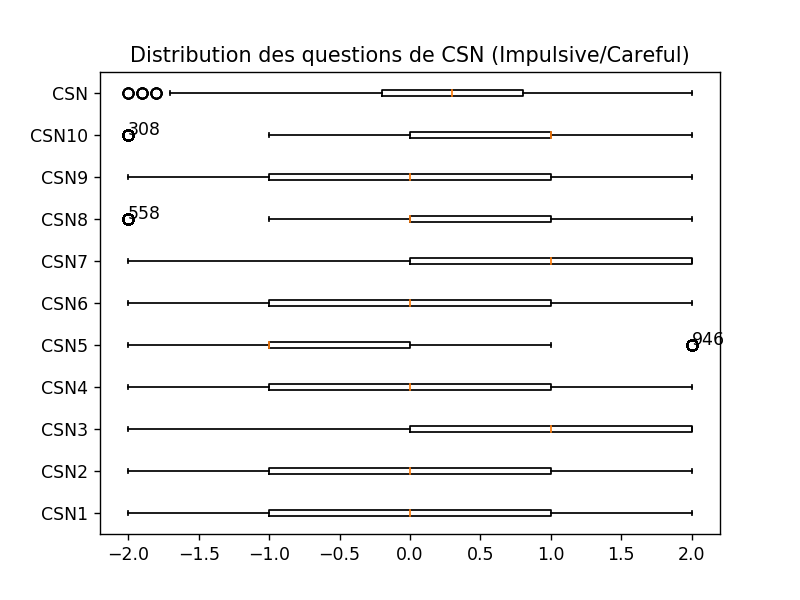

<IPython.core.display.Javascript object>


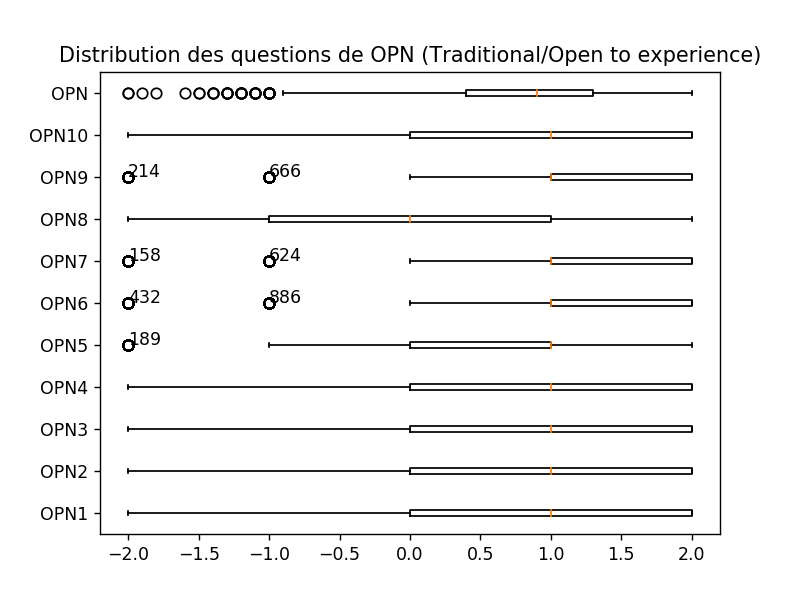

In [16]:
i = 0
for main_group in groups_coef:
    plt.figure()
    for group in groups_coef[main_group]['groups']:
        values = data[group].values
        box = plt.boxplot(values, labels=[group], positions=[i], vert=False)
        for flierXY in np.unique(box['fliers'][0]._x):
            plt.text(flierXY, i, str(len([x for x in values if x == flierXY])))
        i+=1
    box = plt.boxplot(data[main_group].values, labels=[main_group], positions=[i], vert=False)   
    plt.title("Distribution des questions de " + main_group + " (" + groups_coef[main_group]['name'] + ")")
    plt.savefig("figures/fig_3.png")
    plt.show()

On voit que les valeurs moyennes des traits se situent à 0 pour EXT et EST, 0.5 pour CSN, mais sont plutôt à 1 pour AGR et OPN.
Néanmoins les valeurs se rapprochent d'une loi Normale, avec des valeurs de Kurtosis et d'asymétrie comprises entre -1 et 1.  
On peut aussi remarquer qu'aucune valeur extrème ne se situe sur la droite des courbes, et qu'il n'existe d'ailleurs que très peu de valeurs extrèmes. 

<IPython.core.display.Javascript object>


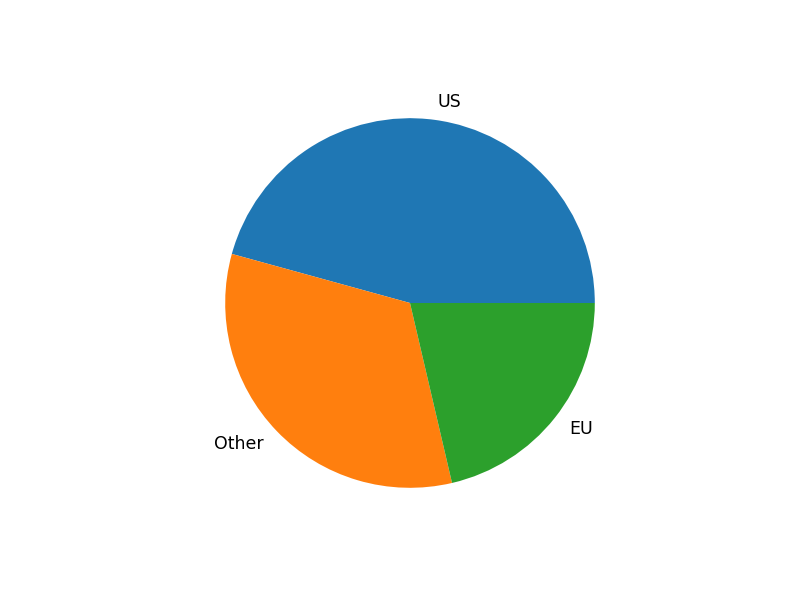

In [17]:
plt.figure()
EU = ["AT", "BE", "BG", "CY", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "GB", "GR", "HR", "HU", "IE", "IT", "LT", "LU", "LV", "MT", "NL", "PL", "PT", "RO", "SE", "SI", "SK"]

data['country_group'] = data.apply(lambda row : 'US' if row['country'] == 'US' else 'EU' if row['country'] in EU else 'Other', axis=1)
data['country_group_id'] = data['country_group'].astype('category').cat.codes
plt.pie(data['country_group'].value_counts(), labels=data['country_group'].value_counts().index)
plt.savefig("figures/fig_4.png")
plt.show()

summary_data = data[traits + ['country_group']]
questions_data = data[questions + ['country_group']]

In [18]:
data["country_code"] = data["country"].astype('category').cat.codes
data['is_US'] = data['country'] == 'US'
data.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0  -2.0  -1.0   0.0  -2.0  -1.0  -1.0  -2.0  -2.0  -1.0   -2.0  -1.0  -1.0   
1   1.0  -2.0   1.0  -0.0  -1.0  -2.0  -1.0   2.0   1.0   -2.0   1.0  -1.0   
2   1.0  -1.0   1.0  -0.0  -1.0  -1.0  -1.0  -1.0   0.0   -1.0   1.0  -1.0   
3  -1.0   1.0   2.0  -0.0   2.0  -1.0   0.0  -2.0   0.0    1.0  -1.0  -1.0   
4   0.0   1.0   1.0  -0.0  -2.0  -1.0   0.0  -0.0   2.0   -2.0   2.0   0.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0  -2.0   0.0  -1.0  -1.0   1.0  -0.0  -1.0   -0.0  -2.0  -1.0   1.0   1.0   
1  -2.0   1.0  -2.0  -1.0  -1.0  -1.0  -1.0   -1.0  -1.0  -0.0  -2.0  -0.0   
2   1.0  -2.0  -0.0  -1.0  -2.0  -1.0  -0.0   -1.0  -1.0  -0.0   1.0  -1.0   
3  -0.0   0.0  -0.0  -0.0  -1.0  -0.0  -1.0    1.0   0.0  -2.0   2.0   1.0   
4  -2.0   0.0  -2.0   2.0  -0.0   2.0   2.0   -0.0   1.0   1.0  -2.0   1.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0  -1.0  -2.0   1.0   1.0  -1.0   -0.0   0.0   2.0   1.0   1.0  -2.0  -2.0   
1   2.0  -1.0   1.0   1.0  -0.0   -2.0  -1.0   1.0   1.0  -1.0   0.0  -2.0   
2   0.0  -1.0   0.0  -0.0   1.0    1.0   0.0   2.0   2.0   1.0  -1.0   2.0   
3   0.0  -1.0  -2.0  -0.0  -0.0   -2.0   1.0  -1.0   2.0   2.0   0.0   1.0   
4   1.0   2.0  -1.0   2.0  -1.0   -2.0   2.0   2.0   2.0  -0.0   2.0   2.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   2.0  -1.0  -2.0   -1.0   0.0   1.0   1.0   1.0   2.0   1.0  -2.0  -1.0   
1   1.0  -0.0  -1.0    0.0  -2.0   1.0   0.0  -0.0   0.0   1.0   0.0  -2.0   
2   1.0  -0.0   1.0    0.0   1.0   1.0   1.0  -0.0   0.0   1.0   2.0   1.0   
3   2.0   2.0   1.0    1.0   1.0   2.0   2.0   2.0   0.0   2.0   1.0  -2.0   
4   2.0  -0.0   2.0    2.0   0.0  -2.0   2.0  -2.0   0.0   2.0  -1.0  -2.0   

   OPN9  OPN10 country  EXT  EST  AGR  CSN  OPN country_group  \
0   2.0   -1.0      AU -1.4 -0.6 -0.3 -0.2  0.4         Other   
1   1.0    1.0      PK -0.3 -0.8 -0.2 -0.2  0.0         Other   
2   0.0   -1.0      SE -0.4 -0.6  0.0  0.8  0.6            EU   
3   1.0    1.0      US  0.2 -0.3 -0.4  1.1  1.0            US   
4   2.0    2.0      CA -0.1  0.4  0.2  1.6  0.1         Other   

   country_group_id  country_code  is_US  
0                 1             6  False  
1                 1            96  False  
2                 0           108  False  
3                 2           122   True  
4                 1            20  False

### Les variables entre-elles

<IPython.core.display.Javascript object>


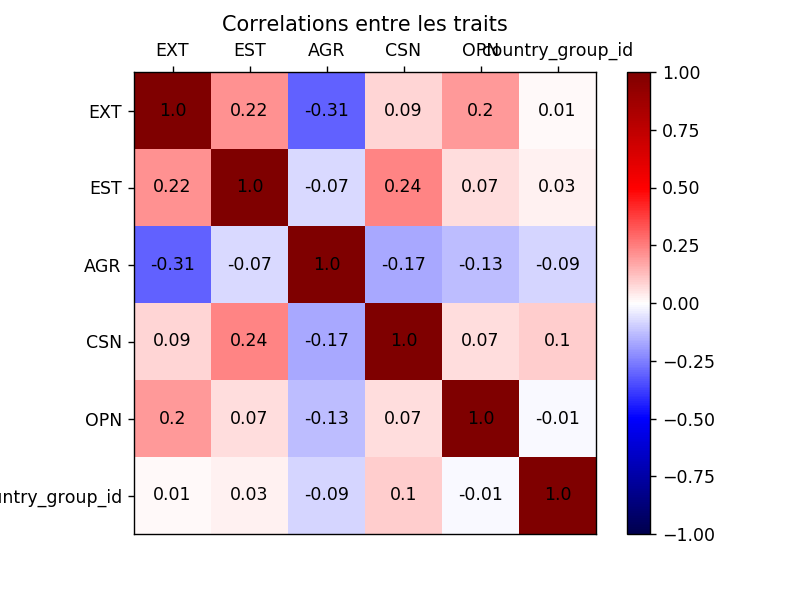

In [19]:
plt.figure()
cols = [main for main in groups_coef] + ['country_group_id']
main_correlations = data[cols].corr()
plt.gca().xaxis.tick_top()
plt.xticks(ticks=[i for i in range(len(cols))], labels=cols)
plt.yticks(ticks=[i for i in range(len(cols))], labels=cols)
plt.imshow(main_correlations, vmin=-1, vmax=1, cmap=matplotlib.cm.seismic)
plt.colorbar()
for iColumn, row in enumerate(cols):
    for iRow, col in enumerate(cols):
        plt.text(iColumn, iRow, round(main_correlations[col][row], 2), ha="center", va="center", color="black")
plt.title("Correlations entre les traits")
plt.savefig("figures/fig_5.png")
# afficher l'image
plt.show()

<IPython.core.display.Javascript object>


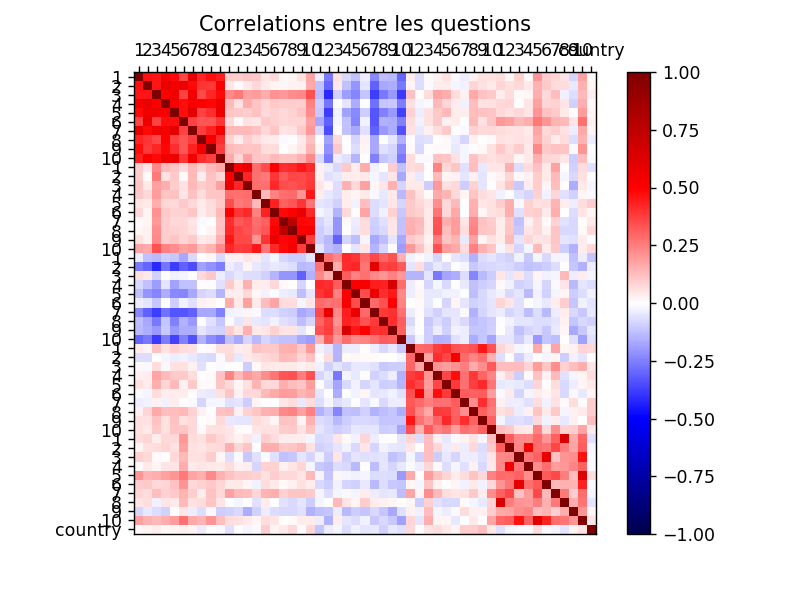

In [20]:
plt.figure()
cols = [question for question in groupsAndNumber] + ["country_group_id"]
questions_correlations = data[cols].corr()
plt.gca().xaxis.tick_top()
plt.xticks(ticks=[i for i in range(len(cols))], labels=["country" if question == "country_group_id" else question[3:] for question in cols])
plt.yticks(ticks=[i for i in range(len(cols))], labels=["country" if question == "country_group_id" else question[3:] for question in cols])
plt.imshow(questions_correlations, vmin=-1, vmax=1, cmap=matplotlib.cm.seismic)
plt.colorbar()
plt.title("Correlations entre les questions")
plt.savefig("figures/fig_6.png")
# afficher l'image
plt.show()

On peut remarquer une forte corrélation dans les questions d'un même trait, et des corrélations plutôt faibles vers les autres traits.
Les traits ont une faible corrélations entre eux, on peut voir qu'au maximum on atteint un coefficient de corrélation de 0.4 (en valeur absolue) entre EXT et AGR.

# Reduction de dimensions : ACP
Afin d'explorer un peu les données, nous allons observer les resultats en réduisant le nombre de dimensions jusqu'à 3. Ainsi nous essayerons de diviser les resultats en differents groupes.

Nous allons appliquer une ACP (*Analyse en Composantes Principales*), puis nous appliquerons une technique de clustering par K-Means pour determiner plusieurs groupes d'après ce resultat.

In [21]:
X_df = summary_data.drop(columns=['country_group'])
X = X_df.apply(pow, exp=1).values
my_pca = PCA(std_unit=True, row_labels=X_df.index.values, col_labels=X_df.columns.values)
my_pca.fit(X)

PCA(col_labels=array(['EXT', 'EST', 'AGR', 'CSN', 'OPN'], dtype=object),
    n_components=None,
    row_labels=array([    0,     1,     2, ..., 11694, 11695, 11696], dtype=int64),
    stats=True, std_unit=True)

<IPython.core.display.Javascript object>


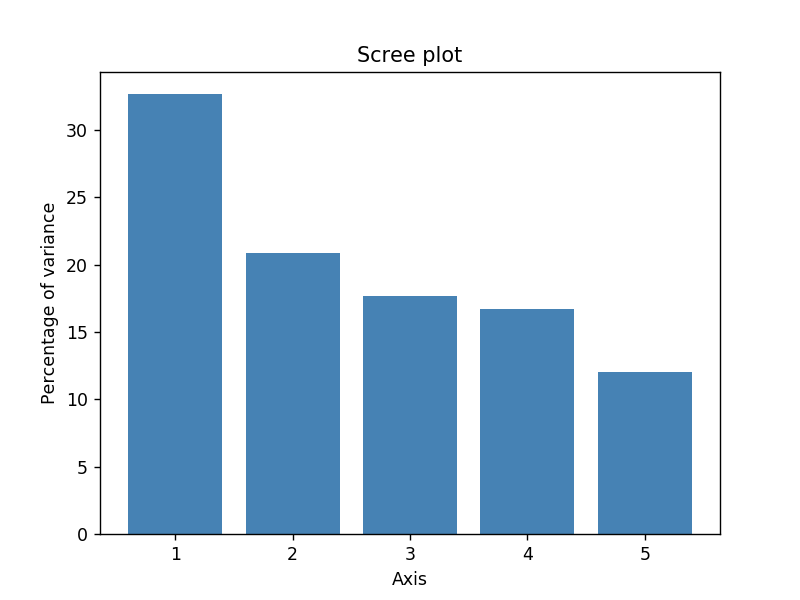

In [22]:
my_pca.plot_eigenvalues(type="percentage")
plt.savefig("figures/fig_7.png")

La PCA ne semble pas très efficace sur ce jeu de données étant donné les proportions de variance. Il faut considérer les 3 premiers axes comme principaux pour representer à 70% les données.
Nous allons innover la representation du cercle des corrélations avec une sphère, mais le principe reste le même.

<IPython.core.display.Javascript object>


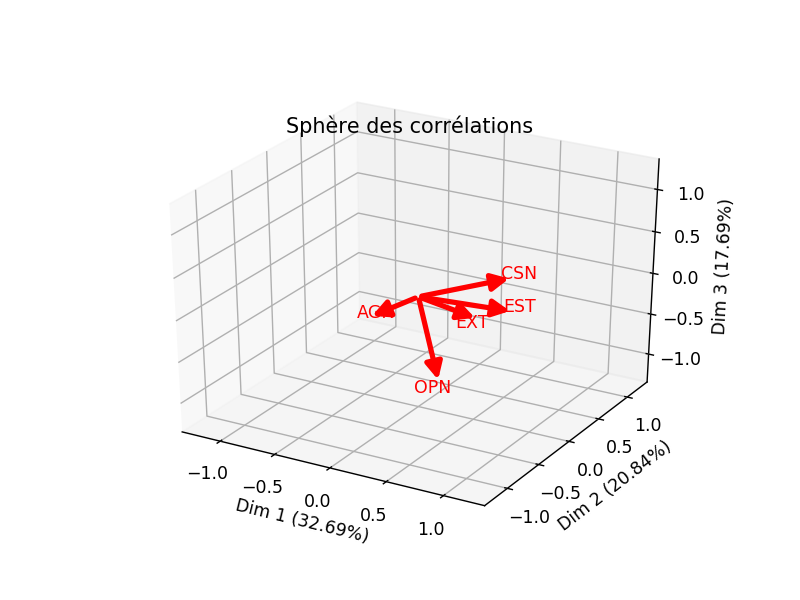

In [23]:
correlation_circle(my_pca, axis=[1, 2, 3], groups_coef=groups_coef)
plt.title("Sphère des corrélations")
plt.show()

On peut voir que "EXT" est l'opposé de "AGR", que "OPN" est complètement perpendiculaire (~ independant) à "EXT" et "AGR", de même pour "CSN" et "EST", qui semblent très proches.
Une conjecture peut être posée avec ce graphique : 
* Les personnes extraverties (*EXT*) sont moins agressives (*AGR*)
* Une personne organisée (*CSN*) est emotionellement stable (*EST*)
* L'ouverture d'esprit (*OPN*) est un trait indépendant 

On peut imaginer une opposition entre "EXT" et "AGR".

<IPython.core.display.Javascript object>


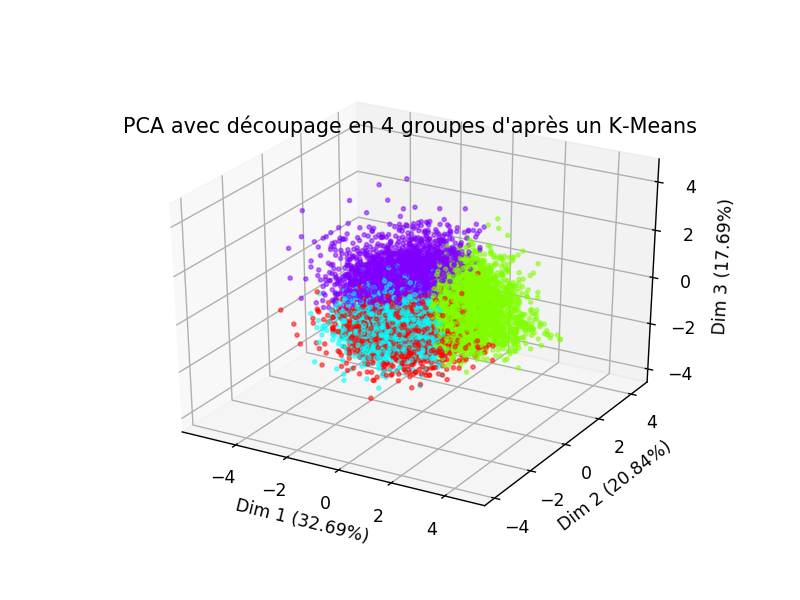

In [24]:
kmeans = KMeans(n_clusters = 4, random_state=0) 
colors = kmeans.fit_predict(pd.DataFrame(my_pca.row_coord_).iloc[:, 0:3].values)
colors = list(map(lambda grp : colorsys.hsv_to_rgb(grp/len(kmeans.cluster_centers_), 1, 1), colors))
mapping_row(my_pca, axis=[1, 2, 3], colors=colors, displayLabel=False, originalData=data)
plt.title("PCA avec découpage en 4 groupes d'après un K-Means")
plt.show()

<IPython.core.display.Javascript object>


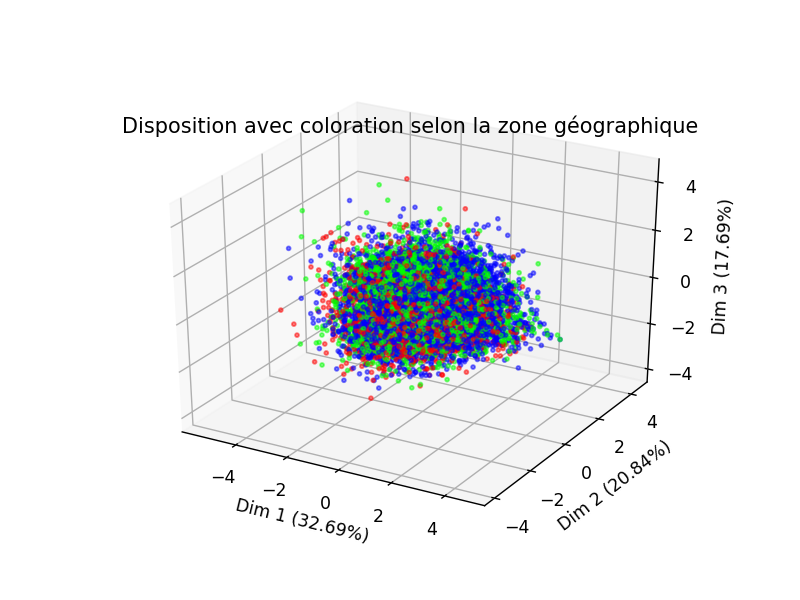

In [25]:
mapping_row(my_pca, axis=[1, 2, 3], colorOnCountryGroup=True, displayLabel=False, originalData=data)
plt.title("Disposition avec coloration selon la zone géographique")
plt.show()

Nous pouvons conclure plusieurs points d'après ces représentations :
* Le découpage par K-Means ne signifie pas grand chose car le nuage de points n'est pas suffisament dispersé.
* Même avec 3 axes, nous atteignons tout juste les 70% de representation de la variance, ce qui reste plutôt faible.
* Les traits *CSN* et *EST* sont relativement corrélés (on a vu une corrélation de 0.23 dans la figure 9) et de même pour *EXT* et *AGR* (-0.35 de corrélation)
* La répartition des traits semble identique parmis les differentes régions géographiques ("US", "UE", "autre").

On peut voir qu'à travers cette ACP, les américains ne semblent pas avoir de difference avec le reste des réponses. 
Essayons de les distinguer par une méthode de clustering, plutôt.

## ACP rapide : focalise sur AGR, CSN et OPN
Nous allons essayer de réaliser le même principe, seulement sur AGR, CSN et OPN :

In [26]:
X_df = questions_data[groups_coef['AGR']['groups'] + groups_coef['CSN']['groups'] + groups_coef['OPN']['groups']]
X = X_df.apply(pow, exp=1).values
my_pca = PCA(std_unit=True, row_labels=X_df.index.values, col_labels=X_df.columns.values)
my_pca.fit(X)

PCA(col_labels=array(['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8',
       'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4',
       'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'], dtype=object),
    n_components=None,
    row_labels=array([    0,     1,     2, ..., 11694, 11695, 11696], dtype=int64),
    stats=True, std_unit=True)

<IPython.core.display.Javascript object>


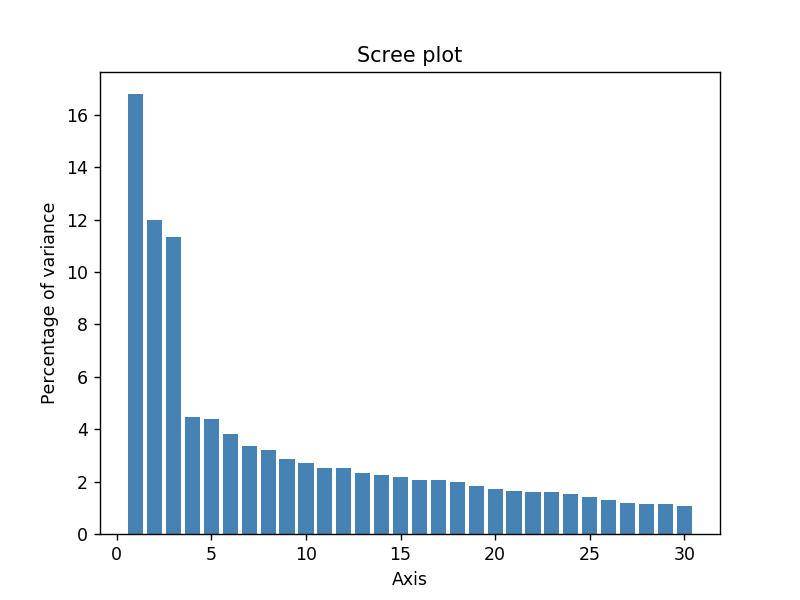

In [27]:
my_pca.plot_eigenvalues(type="percentage")
plt.savefig("figures/fig_8.png")

<IPython.core.display.Javascript object>


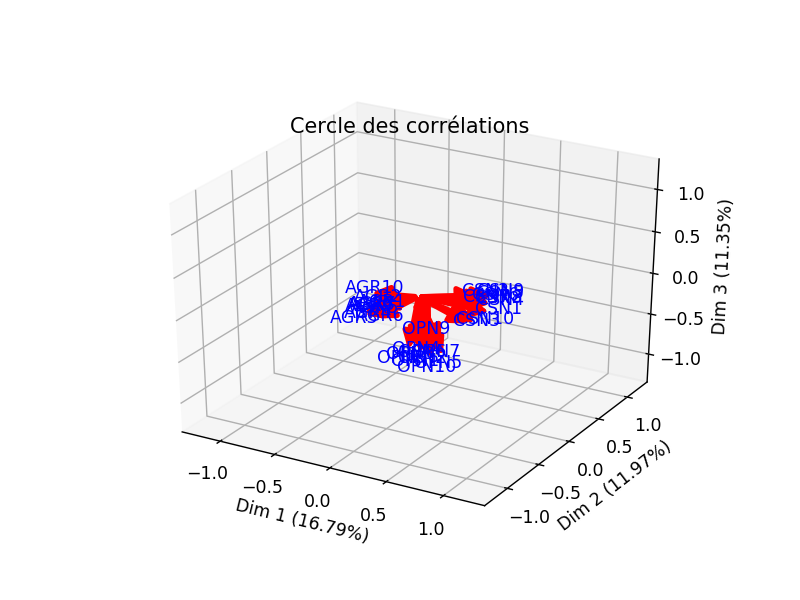

In [28]:
correlation_circle(my_pca, axis=[1, 2, 3], groups_coef=groups_coef)
plt.title("Cercle des corrélations")
plt.show()

<IPython.core.display.Javascript object>


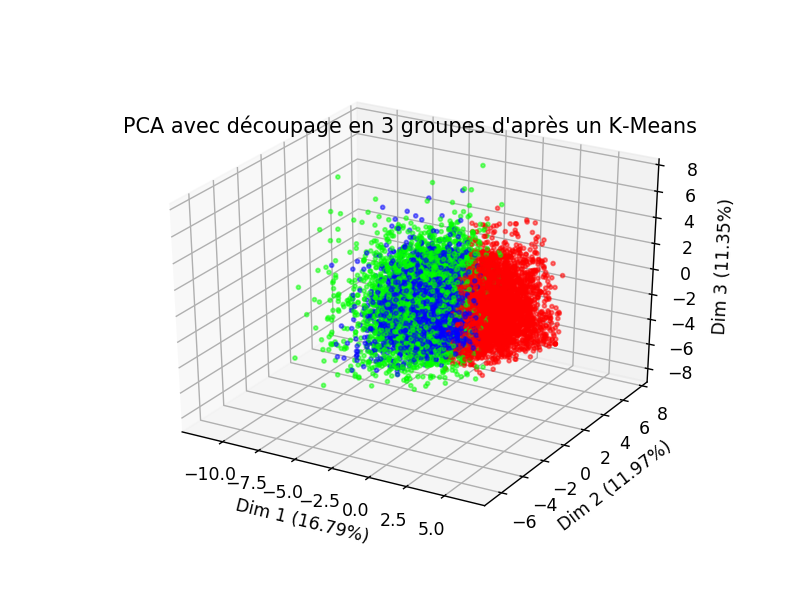

In [29]:
kmeans = KMeans(n_clusters = 3, random_state=0) 
colors = kmeans.fit_predict(pd.DataFrame(my_pca.row_coord_).iloc[:, 0:3].values)
colors = list(map(lambda grp : colorsys.hsv_to_rgb(grp/len(kmeans.cluster_centers_), 1, 1), colors))
mapping_row(my_pca, axis=[1, 2, 3], colors=colors, displayLabel=False, originalData=data)
plt.title("PCA avec découpage en 3 groupes d'après un K-Means")
plt.show()

<IPython.core.display.Javascript object>


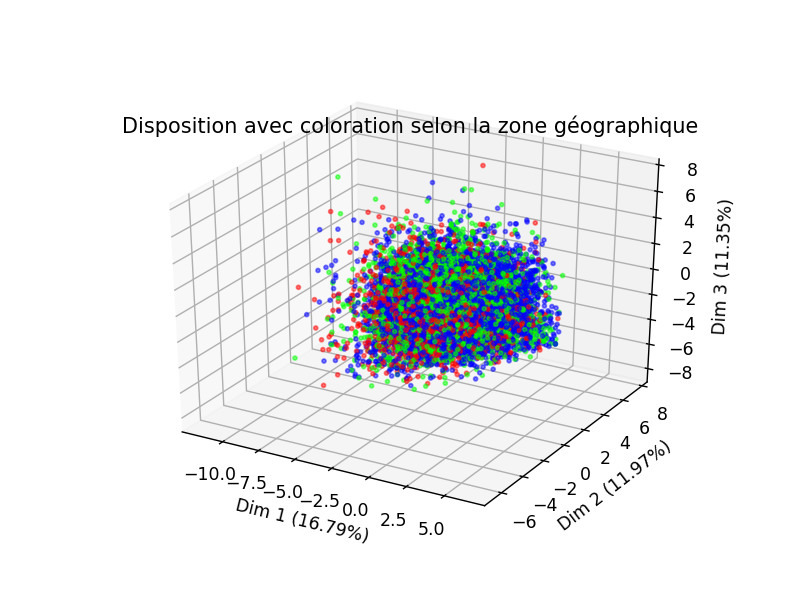

In [30]:
mapping_row(my_pca, axis=[1, 2, 3], colorOnCountryGroup=True, displayLabel=False, originalData=data)
plt.title("Disposition avec coloration selon la zone géographique")
plt.show()

Nous avons à la fois réduit les données que nous étudions (limités à "AGR", "CNS" et "OPN"), mais avons en même temps détaillé chacun d'eux (inclusion de chaque question).
Avec l'algorithme du K-mean de la figure 16, nous pouvons distinguer 3 groupes : les agressifs (verts), les ouverts (bleus) et les consciencieux (rouges).
Nous n'avons par contre toujours pas pu distinguer les individus géographiquement.

## Scoring

Bien, il semble qu'il est impossible de distinguer l'origine géographique d'une personne "à vue d'oeil". Nous allons utiliser des algorithmes de classification binaire pour essayer de contourner ce problème. Nous avons choisis une classification *binaire*, donc nos modèles ne permettrons pas de déterminer le pays d'origine, mais plutôt si une personne vient d'un certain pays ou non. Ici nous avons choisi d'étudier les américains.
Nous allons utiliser les algorithmes suivants pour créer nos modèles: 
* des Decision Tree Classifier (DTC)
* des Random Forests Classifier (RFC)
* des K-Neighbors Classifier (KNN)
* et un K-Means.

Colonne à étudier : `is_US`

In [31]:
predictedColumn = 'is_US'

Xtotal = data.drop(columns=[predictedColumn]+['country', 'country_code', 'country_group', 'country_group_id'])
Ytotal = data[predictedColumn]
X, X_test, Y, Y_test = train_test_split(Xtotal, Ytotal, test_size=0.1)

maxDeapthForTrees = [5, 10 ,15]
k = 5

safe_primes = [5, 7, 11, 23, 47, 59, 83, 107, 167, 179, 227, 263, 347, 359, 383, 467, 479, 503, 563, 587, 719, 839, 863, 887, 983, 1019, 1187, 1283, 1307, 1319, 1367, 1439, 1487, 1523, 1619, 1823, 1907, 2027, 2039, 2063, 2099, 2207, 2447, 2459, 2579, 2819, 2879, 2903]
knn_n = safe_primes[:23:3] # just for fun, use "safe primes"
estimators = [
    {
        'type' : ensemble.RandomForestClassifier(ccp_alpha=0), 
        'params' : {
        'n_estimators' : [150, 300, 200],
        'criterion' : ('gini', 'entropy'),
            'max_depth' : maxDeapthForTrees,
        }
    },
    {
        "type" : tree.DecisionTreeClassifier(ccp_alpha=0), 
        "params" : {
            'criterion' : ('gini', 'entropy'),
            'splitter' : ('best', 'random'),
            'max_depth' : maxDeapthForTrees,
        }
    },
    {
        "type" : neighbors.KNeighborsClassifier(weights='distance'), 
        "params" : {
            'n_neighbors' : knn_n,
            'algorithm' : ('ball_tree', 'kd_tree', 'brute'),
        }
    },
    {
        "type" : KMeans(n_clusters=2, random_state=0, max_iter=800),
        "params" : {
            "algorithm" : ['full', 'elkan'],
            "n_init" : [10, 50, 100]
        }
    }
]

Nous avons besoin d'une fonction de scoring personnalisée pour le KMeans car le scoring de base ne determine pas une *accuracy*. Nous avons alors une fonction de scoring qui ne fonctionne qu'avec 2 Clusters (cela pourrait être généralisé, mais je n'ai pas fait d'effort).
Avec des clusters, on ne peut pas savoir si le cluster 1 represente les américains ou les non-américains. On part du postulat si `y_pred[x] == 1` et `y_true[x] == True` alors nous avons raison. Mais si le score final est inférieur à 50%, c'est que le postulat est faux, nous avons alors un score réel de `1-score`.

In [32]:
def scoring_for_kmeans(y_true, y_pred) :
    found = [(y_true.array[i] == True and y_pred[i] == 1) or (y_true.array[i] == False and y_pred[i] == 0) for i in range(len(y_pred))]
    found = list(filter(lambda x : x, found))
    score = len(found)/len(y_pred)
    if score < 0.5:
        return 1 - score
    return score

score_kmeans = sklearn.metrics.make_scorer(scoring_for_kmeans)

Ajoutons une fonctionalité pratique pour pouvoir visualiser et comparer les differents classifieurs dans un graphique.
En ajoutant un *listener* "hover" sur les graphiques, il sera possible d'ajouter des annotations au passage de la souris sur les points. Cela nous permettra de classer visuellement nos modèles et de pouvoir les regarder individuellement aussi.

In [33]:
def update_annot(sc, scIndex, ind, annot):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    dotId = ind["ind"][0]
    texts = []
    texts += ["fit time : " + str(round(results[scIndex]["mean_fit_time"][dotId]*1000, 2))]
    texts += ["score time : " + str(round(results[scIndex]["mean_score_time"][dotId]*1000, 2))]
    for param in results[scIndex]["params"][dotId]:
        try:
            texts += [param + " : " + str(round(results[scIndex]["params"][dotId][param], 2))]
        except:
            texts += [param + " : " + str(results[scIndex]["params"][dotId][param])]
    annot.set_text("\n".join(texts))
    annot.get_bbox_patch().set_alpha(0.4)

def hover(event, plots, annot):
    vis = annot.get_visible()
    if event.inaxes == plot:
        for i, sc in enumerate(plots):
            print(sc)
            cont, ind = sc.contains(event)
            if cont:
                update_annot(sc, i, ind, annot)
                annot.set_visible(True)
                fig.canvas.draw_idle()


<IPython.core.display.Javascript object>


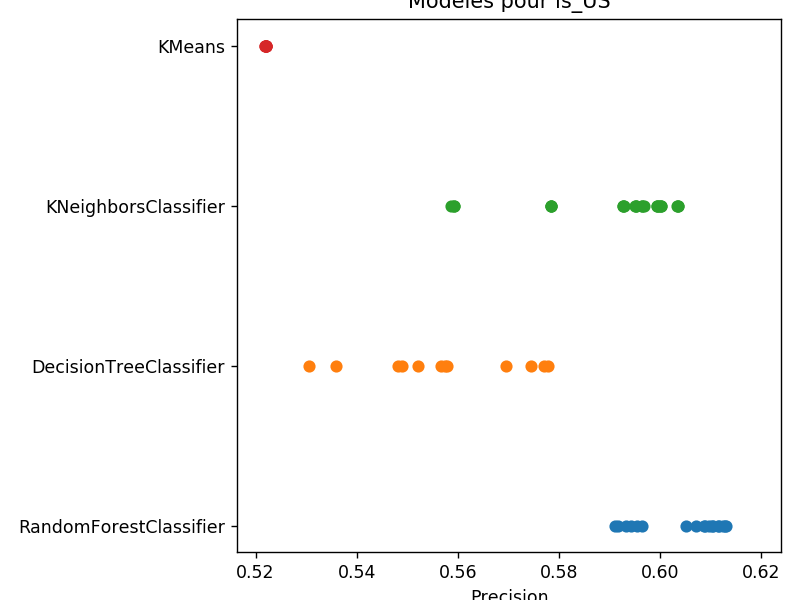

Trying RandomForestClassifier (18 combinaisons)... Ok!
Trying DecisionTreeClassifier (12 combinaisons)... Ok!
Trying KNeighborsClassifier (24 combinaisons)... Ok!
Trying KMeans (6 combinaisons)... Ok!


In [34]:
verbose = True
def displayClassifiersPlots():
    fig = plt.figure()
    plot = fig.add_subplot(111)
    plots = []

    annot = plot.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    results = []

    for i, estimator in enumerate(estimators):
        combinaisons = math.prod([len(estimator['params'][x]) for x in estimator['params']])
        if verbose:
            print("Trying " + estimator["type"].__class__.__name__ + " (" + str(combinaisons) + " combinaisons)... ", end="", flush=True)
        GSCV = model_selection.GridSearchCV(estimator["type"], estimator["params"] , cv = k, 
                                            scoring=score_kmeans if estimator['type'].__class__.__name__ == "KMeans" else None)
        GSCV.fit(X, Y)
        result = GSCV.cv_results_
        x = []
        y = [estimator["type"].__class__.__name__]*(len(result["params"]))
        results.append(result)
        for combi in range(len(result["params"])) :
            x.append(result["mean_test_score"][combi])
        if verbose:
            print("Ok!")
        plots.append(plt.scatter(x, y, marker="o", gid=i))
        estimators[i]["best"] = GSCV.best_estimator_

    fig.canvas.mpl_connect("motion_notify_event", lambda event : hover(event, plots, annot))
    plt.tight_layout()
    plt.title("Modèles pour is_US")
    plt.xlabel("Precision")
    plt.show()
displayClassifiersPlots()

~~En passant la souris sur les différents points, on peut voir quelle configuration apporte quel score sur chaque classifieur.~~ *Edit de fin de projet : Ah non, ça ne marche pas... Peu importe, on a tout de même enregistré les meilleurs hyperparamètres des classifieurs*  
Pour la suite, nous allons garder uniquement le meilleur de chaque classifieur, stocké dans `estimators[x]['best']`

In [35]:
for estimator in estimators:
    print(estimator['best'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
DecisionTreeClassifier(ccp_alpha=0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
KNeighborsClassifier(algorithm='

<IPython.core.display.Javascript object>


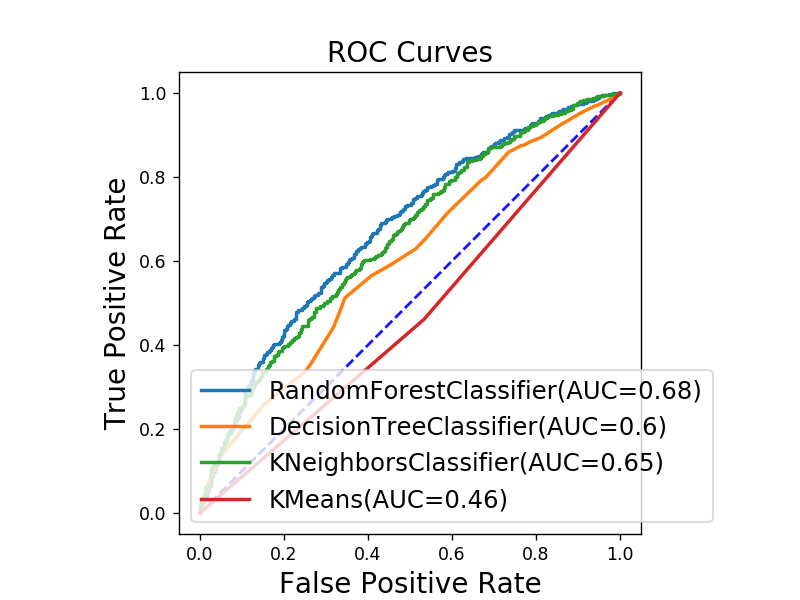

In [36]:
plt.figure()
plt.plot([[0,0], [1,1]], "b--", alpha = 0.7)
for estimator in estimators:
    model = estimator['best']
    # prédire sur le jeu de test
    if hasattr(model, "decision_function"):
        y_test_pred = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        y_test_pred = model.predict_proba(X_test)[:, 1]
    else:
        y_test_pred = model.predict(X_test)


    # construire la courbe ROC
    fpr, tpr, thr = metrics.roc_curve(Y_test, y_test_pred)

    # calculer l'aire sous la courbe ROC
    auc = metrics.auc(fpr, tpr)
    # afficher la courbe ROC
    plt.plot(fpr, tpr, '-', lw=2, label=model.__class__.__name__ + '(AUC=' + str(round(auc, 2)) + ')')



# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curves', fontsize=16)

# afficher la légende
plt.legend(loc="best", fontsize=14)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("figures/fig_9.png")
# afficher l'image
plt.show()

On peut remarquer que le RandomForestClassifier et KNeighbors sont les meilleures solutions, bien que son score soit que légèrement au-dessus de 50%. Les autres solutions restent envisageables, sauf le K-Means qui offre un résultat presque identique au `random()`.

<IPython.core.display.Javascript object>


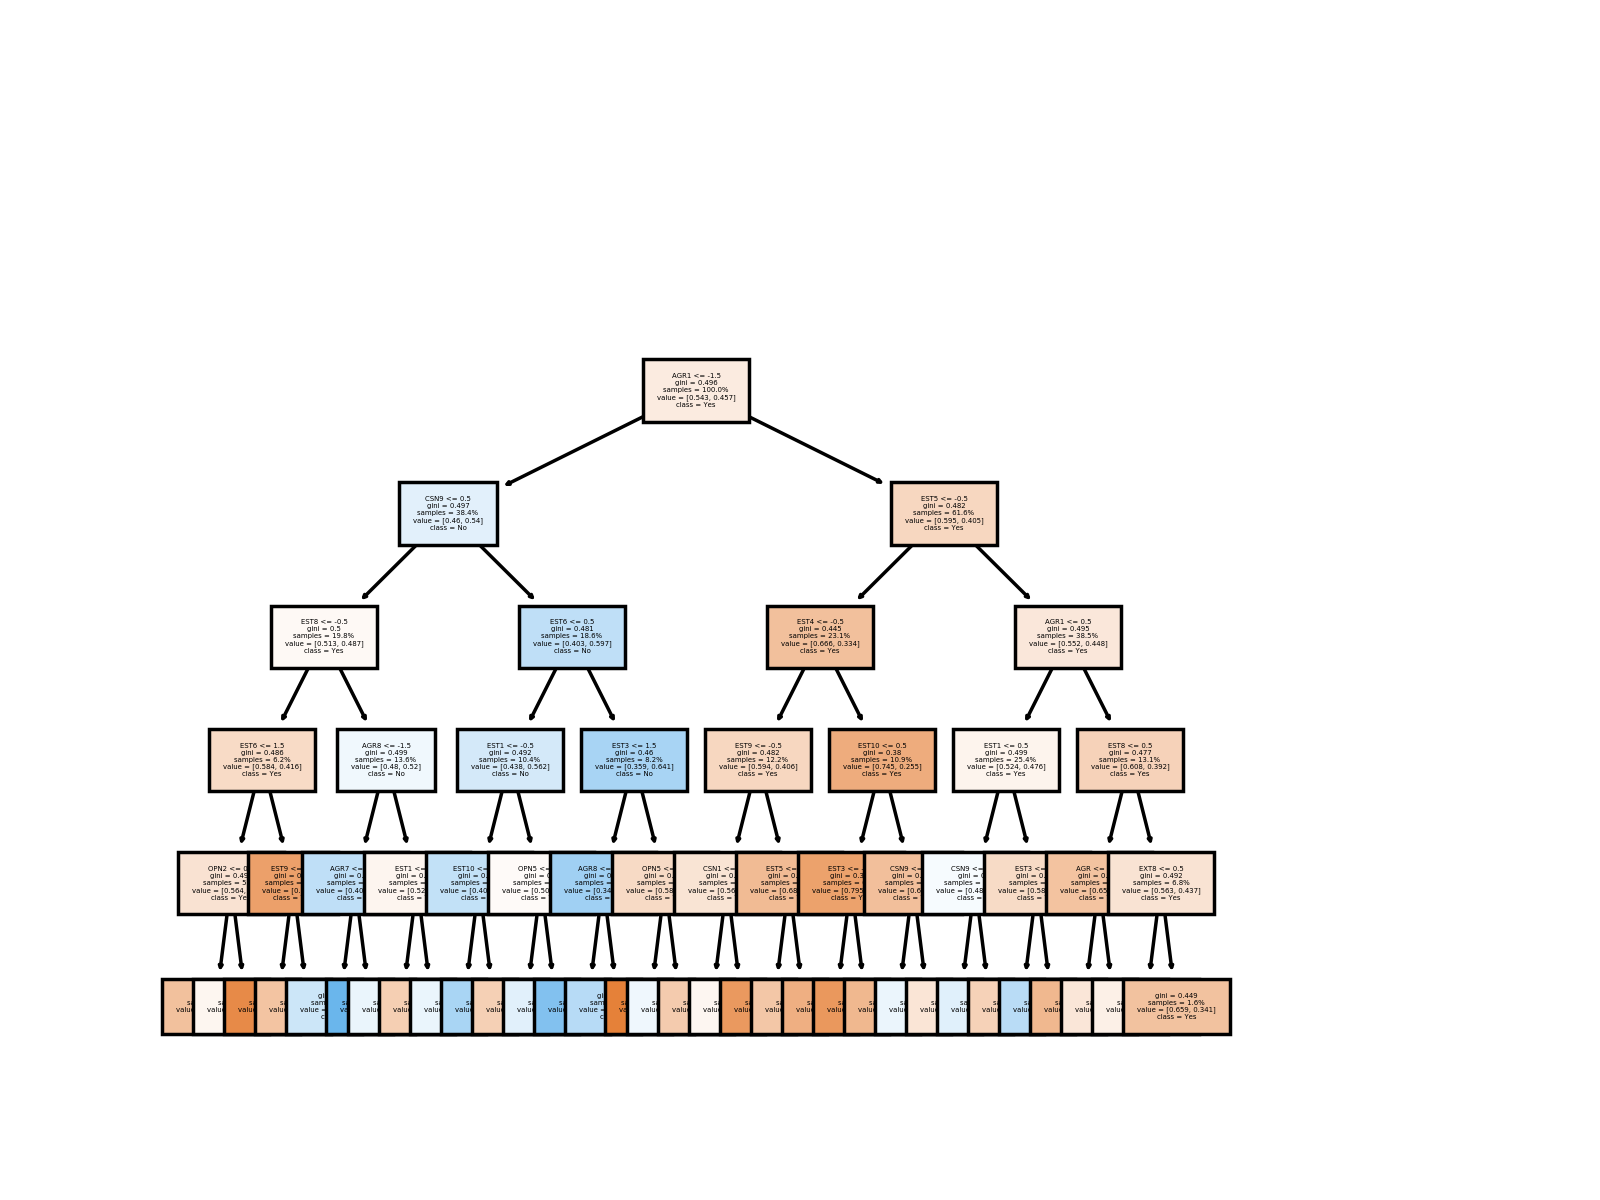

In [37]:
# Pour visualiser l'arbre
from sklearn.tree import export_graphviz, plot_tree
plt.figure(dpi=200)
for estimator in estimators:
    if hasattr(estimator['best'], 'tree_'):
        plot_tree(estimator['best'], filled=True, fontsize=2, class_names=['Yes', 'No'], proportion=True, rotate=True, feature_names=questions+traits)
plt.savefig("figures/fig_10.png")
plt.show()

On peut visualiser l'arbre de décision qui a été utilisé pour déterminer si une personne est américaine ou non. 

## Un pas de plus avec les votes
Nous allons essayer d'ajouter une surcouche à nos classifieurs en instaurant un système de vote. Cela pourra peut-être faire passer le score de précision au delà des 62%.
Le principe est que tous les modèles font les prédictions sur le même jeu de test, puis pour chaque donnée, nous regardons ce que les modèles ont prédit. La décision finale est celle de la majorité.

Nous remarquons que nous avons 4 modèles, donc il faut soit en ajouter un soit en supprimer un pour avoir un vrai système de vote sans *ex æquo*. Par manque de temps de chercher un nouvel algorithme, nous ignorons le K-Means dans les votes.

In [38]:
# Predicting
yPredicted = [[]]*len(estimators)
for i in range(len(estimators)):
    classifier = estimators[i]['best']
    yPredicted[i] = classifier.predict(X_test)
    if estimator['type'].__class__.__name__ == "KMeans" :
        print(classifier.__class__.__name__, " : ", round(scoring_for_kmeans(Y_test, yPredicted[i])*100, 2), "%")
    else :
        print(classifier.__class__.__name__, " : ", round(classifier.score(X_test, Y_test)*100, 2), "%")

lastPrediction = []
for i in range(len(X_test)) :
    votings = {}
    for j in range(len(estimators)):
        if estimators[j]['type'].__class__.__name__ != "KMeans" :
            if yPredicted[j][i] in votings:
                votings[yPredicted[j][i]] += 1
            else:
                votings[yPredicted[j][i]] = 1

    best = None
    for vote in votings:
        if best == None or votings[vote] > votings[best]:
            best = vote
    lastPrediction.append(best)

good = len([y for y in zip(lastPrediction, Y_test) if y[0] == y[1]])
bad = len([y for y in zip(lastPrediction, Y_test) if y[0] != y[1]])
print("Good : ", good)
print("Bad  : ", bad)
print("Result : ", round((good/(good+bad))*100, 2), "%")

RandomForestClassifier  :  63.16 %
DecisionTreeClassifier  :  58.89 %
KNeighborsClassifier  :  61.2 %
KMeans  :  53.59 %
Good :  730
Bad  :  440
Result :  62.39 %


Dommage, le système de vote offre un score inférieur au meilleur classifieur.

## Scoring sur la question AGR2 : Je m'interesse aux gens.
Bien, nous avons pu estimer si une personne est américaine ou non avec l'aide de la classification binaire. Mais qu'en est-il des réponses pour lesquelles nous cherchons de valeurs continues? Par exemple, si nous souhaitions connaitre la réponse d'une des questions du test, il faudrait avoir une valeur comprise entre 1 et 5. Théoriquement, il serait possible qu'une personne réponde 1.25 plutôt qu'une valeur entière.
Bien qu'en pratique la réponse à une question à travers le formulaire mis en ligne ne peut prendre que 5 valeurs differentes (1, 2, 3, 4 ou 5), nous allons utiliser comme résultat des valeurs continues.
Pour ce faire, nous utilisons les algorithmes suivants :
* Régression linéaire,
* SVC,
* et SVC à kernel linéaire.

Le fonctionnement du code reste très identique au précédent : recherche du meilleur modèle de chaque algorithme puis comparaison entre eux.
Les hyper-paramètres sont limités ici car le temps de *fitting* est très long (surtout pour les SVC à kernel non-linéaires) pour des résultats souvent trop peu différents.

In [39]:
predictedColumn = 'AGR2'

Xtotal = data.drop(columns=[predictedColumn] + ['AGR', 'country']) # Si on garde la moyenne AGR, ça semble trop facile!
Xtotal = pd.get_dummies(Xtotal)
Ytotal = data[predictedColumn]
X, X_test, Y, Y_test = train_test_split(Xtotal, Ytotal, test_size=0.1)


k = 5

estimators = [
    {
        'type' : linear_model.LogisticRegression(fit_intercept=True, C=1, multi_class='auto'),#, C=0.03), 
        'params' : {
            'penalty' : ('l1', 'l2', 'none', 'elasticnet'),
            'solver' : ('newton-cg', 'liblinear', 'saga'),# 'lbfgs', 'sag'), 
        }
    },
    {
        'type' : svm.SVC(max_iter = 500), 
        'params' : {
            'C' : [10, 20],
            'kernel' : ('linear',  'rbf'),# 'poly', 'sigmoid'), # Trop de temps avec les non-linéaires
            'gamma' : [1, 10]
        }
    },
    {
        'type' : svm.LinearSVC(), 
        'params' : {
            'C' : [10, 20],
            'penalty' : ('l1', 'l2')
        }
    },
]
score_function = metrics.make_scorer(metrics.explained_variance_score)

<IPython.core.display.Javascript object>


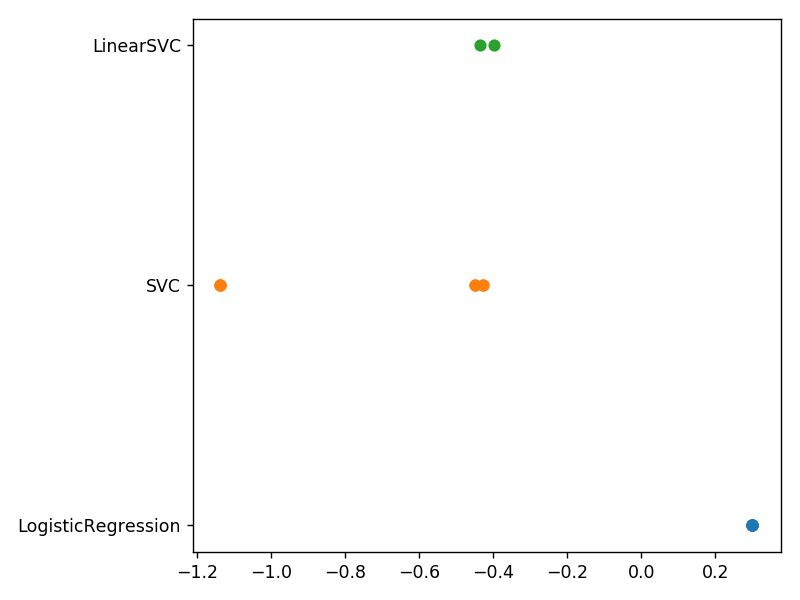

Trying LogisticRegression (12 combinaisons)... Ok!
Trying SVC (8 combinaisons)... Ok!
Trying LinearSVC (4 combinaisons)... Ok!


In [40]:
def displayRegressionPlot():
    fig = plt.figure()
    plot = fig.add_subplot(111)
    plots = []

    annot = plot.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    results = []

    for i, estimator in enumerate(estimators):
        combinaisons = math.prod([len(estimator['params'][x]) for x in estimator['params']])
        if verbose:
            print("Trying " + estimator["type"].__class__.__name__ + " (" + str(combinaisons) + " combinaisons)... ", end="", flush=True)
        GSCV = model_selection.GridSearchCV(estimator["type"], estimator["params"] , cv = k, 
                                            scoring=score_function)
        GSCV.fit(X, Y)
        result = GSCV.cv_results_
        x = []
        y = [estimator["type"].__class__.__name__]*(len(result["params"]))
        results.append(result)
        for combi in range(len(result["params"])) :
            x.append(result["mean_test_score"][combi])
        if verbose:
            print("Ok!")
        plots.append(plt.scatter(x, y, marker="o", gid=i))
        estimators[i]["best"] = GSCV.best_estimator_

    fig.canvas.mpl_connect("motion_notify_event", lambda event : hover(event, plots, annot))
    plt.tight_layout()
    plt.show()
displayRegressionPlot()

On retrouve les meilleurs algorithmes de chaque modèles :

In [41]:
for estimator in estimators:
    print(estimator['best'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
    max_iter=500, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


Pour comparer ces modèles à l'aide de differents scores :
* variance expliquée,
* erreur maximale,
* erreur moyenne,
* valeur de R<sup>2</sup>
* erreur médiane

In [42]:
from sklearn.model_selection import cross_val_score

scoring = ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'r2', 'neg_median_absolute_error']
results_df = pd.DataFrame(columns=['Name']) #  'Erreur Moyenne', 'Precision', 'Erreur moyenne^2'])
for estimator in estimators:
    values = model_selection.cross_validate(estimator['best'], X_test, Y_test, cv=5, scoring=scoring)
    results = {'Name' : estimator["type"].__class__.__name__}
    for value in values:
        results[value[5:] if value[:5] == 'test_' else value] = np.mean(values[value])
    results_df = results_df.append(results, ignore_index=True)
results_df

Name  explained_variance  fit_time  max_error  \
0  LogisticRegression        2.234122e-01  0.132047       -3.8   
1                 SVC       -4.440892e-17  0.233967       -3.0   
2           LinearSVC       -9.649548e-02  0.612562       -3.8   

   neg_mean_absolute_error  neg_median_absolute_error        r2  score_time  
0                -0.648718                       -0.8  0.169550    0.003193  
1                -0.812821                       -1.0 -0.024871    0.034519  
2                -0.851282                       -1.0 -0.184276    0.003193

La regression logistique semble être la solution adéquate:
Elle est une solution rapide (`fit_time` et `score_time`) avec une variance expliquée plus importante et un score de R<sup>2</sup> bien supérieur à la SVC et SVC linéaire. Dans les 3 cas, l'erreur moyenne et médiane est inférieure (ou égale) à 1, ce qui represente une bonne estimation.

<IPython.core.display.Javascript object>


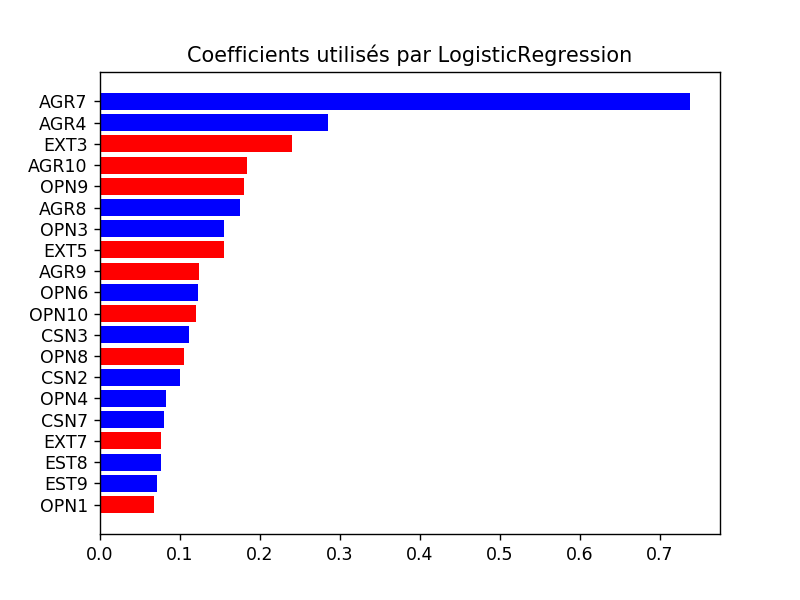

<IPython.core.display.Javascript object>


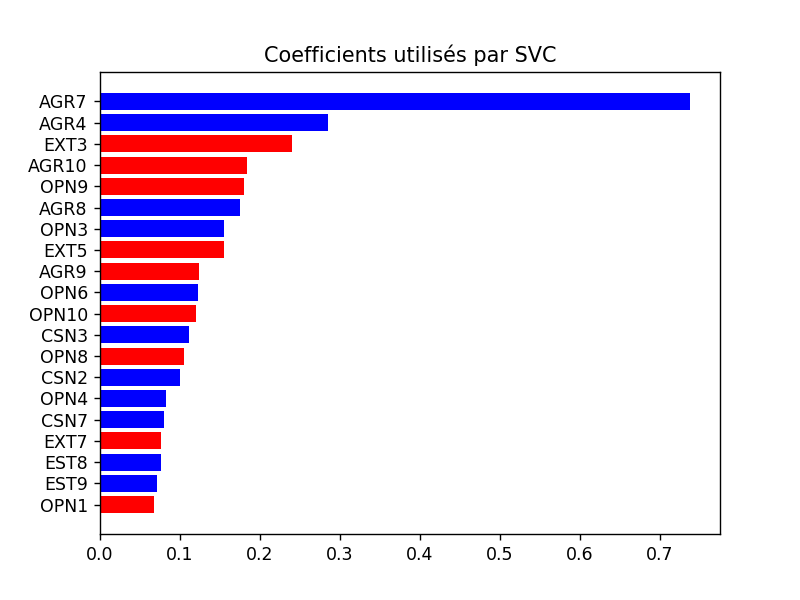

<IPython.core.display.Javascript object>


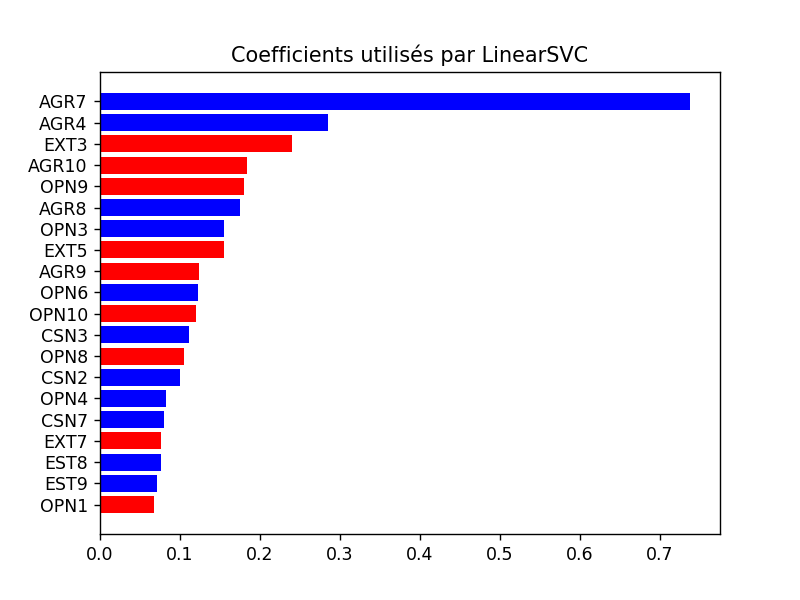

In [43]:
def f_importances(coef, names, limit=20):
    imp = coef
    imp,names = zip(*sorted(zip(np.abs(imp),names)))
    names = names[-limit:]
    colors = ["red" if c < 0 else "blue" for c in coef]
    plt.barh(range(len(names)), imp[-limit:], align='center', color=colors)
    plt.yticks(range(len(names)), names)
    plt.show()
    
for i, estimator in enumerate(estimators):
    plt.figure()
    plt.title('Coefficients utilisés par ' + estimator['type'].__class__.__name__)
    f_importances(estimators[0]['best'].coef_[0], Xtotal.columns)
    plt.savefig("figures/fig_" + str(11 + i) + ".png")

**Attention : cette variable a été <ins>RETOURNÉE</ins>, c'est à dire que une note de -2 représente l'amabilité (s'interesse aux autres) et une note de 2 représente l'agressivité (ne s'interesse pas aux autres) d'une personne**.  
Dans les graphique ci-dessus, la longueur d'une barre est proportionnelle à l'importance d'un facteur et la couleur rouge ou bleue symbolise l'importance positive ou négative de ce facteur.
On remarque que les facteurs utilisés sont exactements les mêmes d'un modèle à l'autre.
Le plus gros coefficient est utilisé sur "AGR7" ("*I am not really interested in others.*"), question avec le meilleur coefficient de corrélation dans la figure 10. C'est très franchement la même question. Ensuite on se sert de questions qui ne sont pas forcément liées à AGR :
* EXT3 : I feel comfortable around people.
* AGR4 : I sympathize with others' feelings.
* OPN9 : I spend time reflecting on things.
* etc...

Analyse rapide : il semblerait que si vous cherchez quelqu'un qui s'interesse aux autres, évitez les gens à l'aise avec la foule, qui ne sympathise pas et qui ait des moment de reflexion.

Nous pouvons, par curiosité, réessayer en retirant les questions *AGR* du jeu d'apprentissage :

In [44]:
Xtotal = data.drop(columns=[predictedColumn] + ['AGR', 'country'] + groups_coef['AGR']['groups']) # On supprime aussi les questions liées à AGR
Xtotal = pd.get_dummies(Xtotal)
Ytotal = data[predictedColumn]
X, X_test, Y, Y_test = train_test_split(Xtotal, Ytotal, test_size=0.1)


k = 5

scoring = ['explained_variance', 'max_error', 'neg_mean_absolute_error', 'r2', 'neg_median_absolute_error']
results_df = pd.DataFrame(columns=['Name'])
for i, estimator in enumerate(estimators):
    newModel = sklearn.base.clone(estimator['best'])
    newModel.fit(X, Y)
    values = model_selection.cross_validate(newModel, X_test, Y_test, cv=5, scoring=scoring)
    results = {'Name' : estimator["type"].__class__.__name__}
    for value in values:
        results[value[5:] if value[:5] == 'test_' else value] = np.mean(values[value])
    results_df = results_df.append(results, ignore_index=True)
    plt.savefig("figures/fig_" + str(14 + i) + ".png")
results_df

Name  explained_variance  fit_time  max_error  \
0  LogisticRegression           -0.035248  0.099933       -3.6   
1                 SVC            0.001277  0.256315       -3.0   
2           LinearSVC           -0.248399  0.601390       -4.0   

   neg_mean_absolute_error  neg_median_absolute_error        r2  score_time  
0                -0.760684                       -1.0 -0.105014    0.002992  
1                -0.764957                       -1.0 -0.009076    0.034109  
2                -0.994017                       -1.0 -0.693137    0.002994

<IPython.core.display.Javascript object>


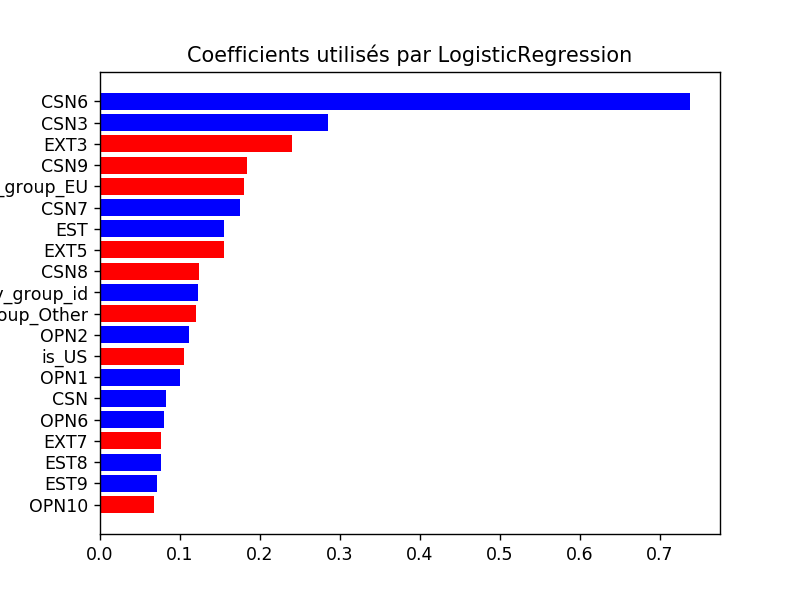

<IPython.core.display.Javascript object>


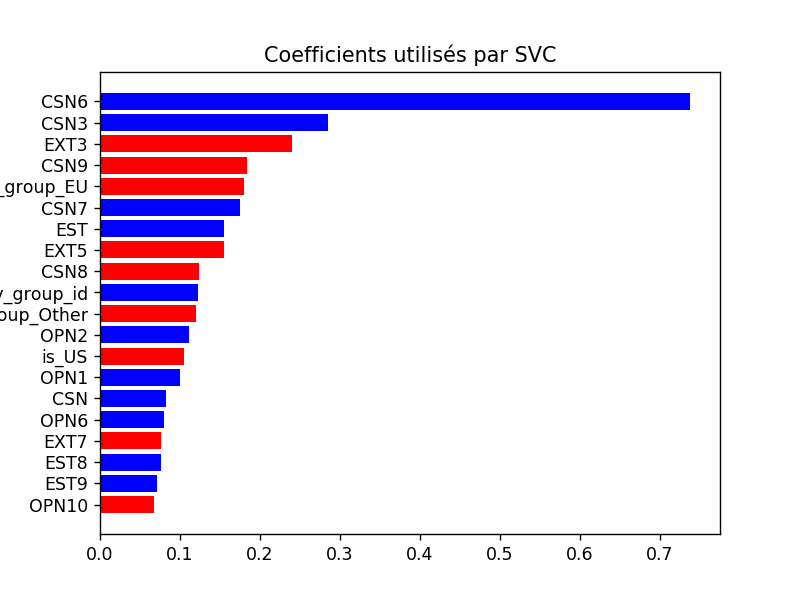

<IPython.core.display.Javascript object>


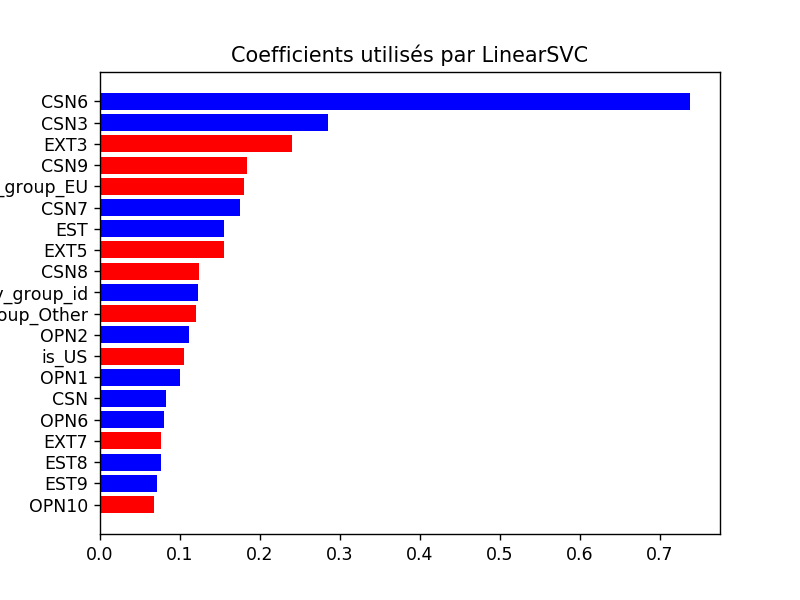

In [45]:
for estimator in estimators:
    plt.figure()
    plt.title('Coefficients utilisés par ' + estimator['type'].__class__.__name__)
    f_importances(estimators[0]['best'].coef_[0], Xtotal.columns)

On sent ici que le jeu de données ne permet pas de déterminer la réponse à une question à partir de celles des autres traits en voyant que la variance expliquée et le score de R<sup>2</sup> sont négatifs dans les 3 modèles. Mais l'erreur moyenne et médiane est tout de même inférieure (ou égale) à 1.
On remarque alors que ce sont de nouvelles questions qui portent le plus d'importance :
* CSN6 : I often forget to put things back in their proper place. (à negativer)
* EXT3 : I feel comfortable around people.
* CSN3 : I pay attention to details.
* is_EU

Analyse rapide : Si j'oublie rarement de ranger les affaires, que je suis confortable dans la foule et que je fais attention aux détails, j'ai des chances de ne pas m'interesser aux gens.
On remarque aussi qu'être européen est un signe possible qu'on s'interesse aux gens, contrairement au fait d'être américain.
Cette dernière assomption reste très floue car les deux variables (`is_EU` et `is_US`) sont les 4<sup>eme</sup> et 12<sup>eme</sup> importance seulement.

# Conclusion:
Nous sommes conscient de la confusion que crée le retournement de certaines questions pour l'analyse.

Nous avons donc étudié le test des Big Fives (ou OCEAN) qui permet de "noter" différents traits de caractère de personnes. Nous avons vu qu'il était *relativement* possible de déterminer le pays d'une personne par ses réponses grâce à des modèles basés sur les K-plus-proches-voisins ou des arbres de décisions.
Nous avons aussi vu qu'une réponse peut être devinée avec des modèles basés sur la régression logistique ou la SVC. Néanmoins il est nécessaire de connaitre d'autres réponses d'un même trait pour estimer une réponse.

Notons tout de même que les données originales ne peuvent pas être des sources fiables pour différentes raisons presque évidentes :
* Le formulaire est rempli par la personne, se jugeant elle-même. 
* Aucune autorité ne permet de juger de la sincérité du formulaire.
* Les adverbes de fréquence comme "rarement", "souvent", "la plupart du temps" sont subjectifs.
* Les questions peuvent être difficile à comprendre pour un non-anglophone

Selon moi, le dernier point est le plus gros facteur de biais car j'ai moi-même été contraint plusieurs fois de chercher des traduction pour être sûr de comprendre le sens d'une question (ex : "*I seldom feel blue.*" peut être interprété comme "*I often feel blue*").

En conclusion : le projet a été interessant d'un point de vue technique, mais me semble inutile d'un point de vue pratique.

## Conclusion personnelle :
Sur un point plus personnel, nous avons beaucoup appris durant ce projet.  
Nous avons accumulé des connaissances dans deux domaines à la fois :
* sur un côté technique du data mining;
* sur un côté communication de la representation de données.

En effet, pour comprendre nous-même les données que nous devions traiter et les resultats que nous recevions, nous avons (de notre point de vue) innové : même si peu compréhensible, l'affichage d'une matrice de corrélation par une heatmap est une technique que l'on réutilisera dans des projets futurs; l'ACP en 3 dimensions est une première pour nous; nous avons redoublé de curiosité et de recherche pour afficher les graphiques de comparaison de modèles de prédiction interactifs; ...

Du côté data mining, le souhait d'utiliser differents algorithmes pour les comparer entre eux nous a poussé à regarder ce qu'il se passe sous le capot lorsqu'on utilise un algorithme. Nous connaissions légèrement les DecisionTree, K-Means et K-Neighbors, LogisticRegressor, mais avons complètement découvert les RandomForest et SVC. 

Il y a eu beaucoup de nouveautés dans ce projet, et beaucoup de difficultés. La première fut d'avoir espéré pouvoir tirer profit d'une étude semblable sur le même jeu de données ([Analysis(Log. Regres-71%, Decision Tree-99%)](https://www.kaggle.com/akspikey/analysis-log-regres-71-decision-tree-99) par [@AKSpikey](https://www.kaggle.com/akspikey)) avant de me rendre compte que ses résultats étaient complètement faux.  
Le premier plus gros problème de ce projet, c'est le temps d'execution : nous avons remarqué que "l'hyperparamètre" `max_iter` de la SVC poussait le programme à tourner plusieurs heure si on gardait la valeur par défaut seulement à la fin du projet, ce qui nous a fait perdre enormément de temps.  
Le second, c'était qu'avant de proposer la centaine de combinaisons d'hyperparamètres pour les 7 algorithmes étudiés présentés dans ce projet, nous en avons essayé plusieurs milliers, laissant nos pauvres ordinateurs à de longues nuits de surchauffe.  

Enfin, la dernière (très) grosse difficulté : les resultats présentés ne sont pas convaincants et je le concède. Après avoir passé des heures à préparer et traiter les données, nous nous sommes rendus compte que nos techniques ne nous apportent que très peu (une ACP peu efficace, des classifications à la précision faible, etc...). Nous avons essayé d'interprété les resultats pour l'exercice, sachant qu'ils ne sont pas recevables dans la réalité. C'est une bonne leçon : tout ne peut pas se résoudre par un arbre de décision et une regression linéaire!  